## Analysis is completed on a sample
The training and test set have following amojnt of lines respectively:

```
Teds-MacBook-Pro:Unity_DataScience ted$ wc -l training_data.csv 
 1869470 training_data.csv
```

This amount of data was taking to much time for my system to run commands on. I take a random sample using the follwing commands:

```
Teds-MacBook-Pro:Unity_DataScience ted$ shuf -n 1869470 training_data.csv > rsample_training_data.csv
```

The analysis is completed on this subset of data.

In [311]:
#load packages
import missingno as msno
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from tqdm import tqdm, trange

import pprint as pp
%matplotlib inline

import warnings

In [316]:
#load data

htrain = pd.read_csv('head_train.csv', sep=';')

dat_train = pd.read_csv('rsample_training_data.csv', sep=';', names=htrain.columns, engine='c', skiprows=[1032482, 1113627])

In [317]:
# only works when `shuf` picks title as row
# random sample column titles are in the following rows
titcol=dat_train[dat_train['startCount']=='startCount'].index
dat_train.drop(index=titcol,inplace=True)

In [318]:
### set column types
coltype = {'id': 'category', 'softwareVersion': 'category', 'deviceType': 'str','campaignId':'category', 'platform':'category',
       'sourceGameId':np.int64, 'country':'category', 'startCount':np.int64, 'viewCount':np.int64, 'clickCount':np.int64,
       'installCount':np.int64,  'startCount1d':np.int64, 'startCount7d':np.int64,
       'connectionType':'category', 'install':np.int8}
for i in coltype:
    dat_train[i]=dat_train[i].astype(coltype[i])

In [319]:
#set time column type
dat_train['timestamp'] = pd.to_datetime(dat_train['timestamp'])
dat_train['lastStart'] = pd.to_datetime(dat_train['lastStart'])
# dates need to be converted for model
dat_train['date'] = dat_train['timestamp'].astype(np.int64) 

# EDA

In [298]:
display(dat_train.head(2))
display(dat_train.describe())
display(dat_train.info())

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,deviceType,install,date
0,5c41ba4c99051c0b374fb417,2019-01-18 11:36:44.503,5bd2b810eb4bb3b817722baa,android,6.0.1,2871898,IN,3,2,1,1,2019-01-18 11:35:31.778,3,3,cellular,vivo vivo 1606,0,1547811404503000000
1,5c3aa751b1a3c01b4ac1bfe9,2019-01-13 02:49:53.282,5c35c9c4585c519bf6ed6250,ios,12.1.2,106156,CN,50,48,0,0,2019-01-01 10:11:12.130,1,1,wifi,"iPhone9,2",0,1547347793282000000


,sourceGameId,startCount,viewCount,clickCount,installCount,startCount1d,startCount7d,install,date
count,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06
mean,3.191072e+06,4.845875e+01,3.605175e+01,2.077464e+00,5.695446e-01,6.804151e+00,1.984489e+01,1.205155e-02,1.547483e+18
std,1.420909e+07,9.021888e+01,7.896515e+01,6.827185e+00,1.545144e+00,1.157733e+01,3.479096e+01,1.091161e-01,3.645079e+14
min,1.105500e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.546906e+18
25%,1.222943e+06,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,1.547148e+18
50%,1.632098e+06,1.900000e+01,1.000000e+01,0.000000e+00,0.000000e+00,3.000000e+00,9.000000e+00,0.000000e+00,1.547463e+18
75%,2.643690e+06,5.300000e+01,3.400000e+01,2.000000e+00,1.000000e+00,8.000000e+00,2.300000e+01,0.000000e+00,1.547820e+18
max,1.316274e+08,3.918000e+03,2.541000e+03,8.980000e+02,6.400000e+01,1.466000e+03,3.280000e+03,1.000000e+00,1.548115e+18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032481 entries, 0 to 1032481
Data columns (total 18 columns):
id                 1032481 non-null category
timestamp          1032481 non-null datetime64[ns]
campaignId         1032481 non-null category
platform           1032481 non-null category
softwareVersion    1032481 non-null category
sourceGameId       1032481 non-null int64
country            1032406 non-null category
startCount         1032481 non-null int64
viewCount          1032481 non-null int64
clickCount         1032481 non-null int64
installCount       1032481 non-null int64
lastStart          956621 non-null datetime64[ns]
startCount1d       1032481 non-null int64
startCount7d       1032481 non-null int64
connectionType     1032481 non-null category
deviceType         1032480 non-null category
install            1032481 non-null int8
date               1032481 non-null int64
dtypes: category(7), datetime64[ns](2), int64(8), int8(1)
memory usage: 150.5 MB


None

### Missing Values Analysis and Feature Engineering

There only appears to be missing values in the `lastStart` column. I am assuming that it is because this is the observation's first event. I will treat this by changing this column to hours since last event and naming it `lastStartHours`. I will also be deriving a month, day of week, and hour columns from `timestamp`. One hot encoding is completed on `connectionType` and `platform`. Categorical variable with higher cardinality will be handled next.

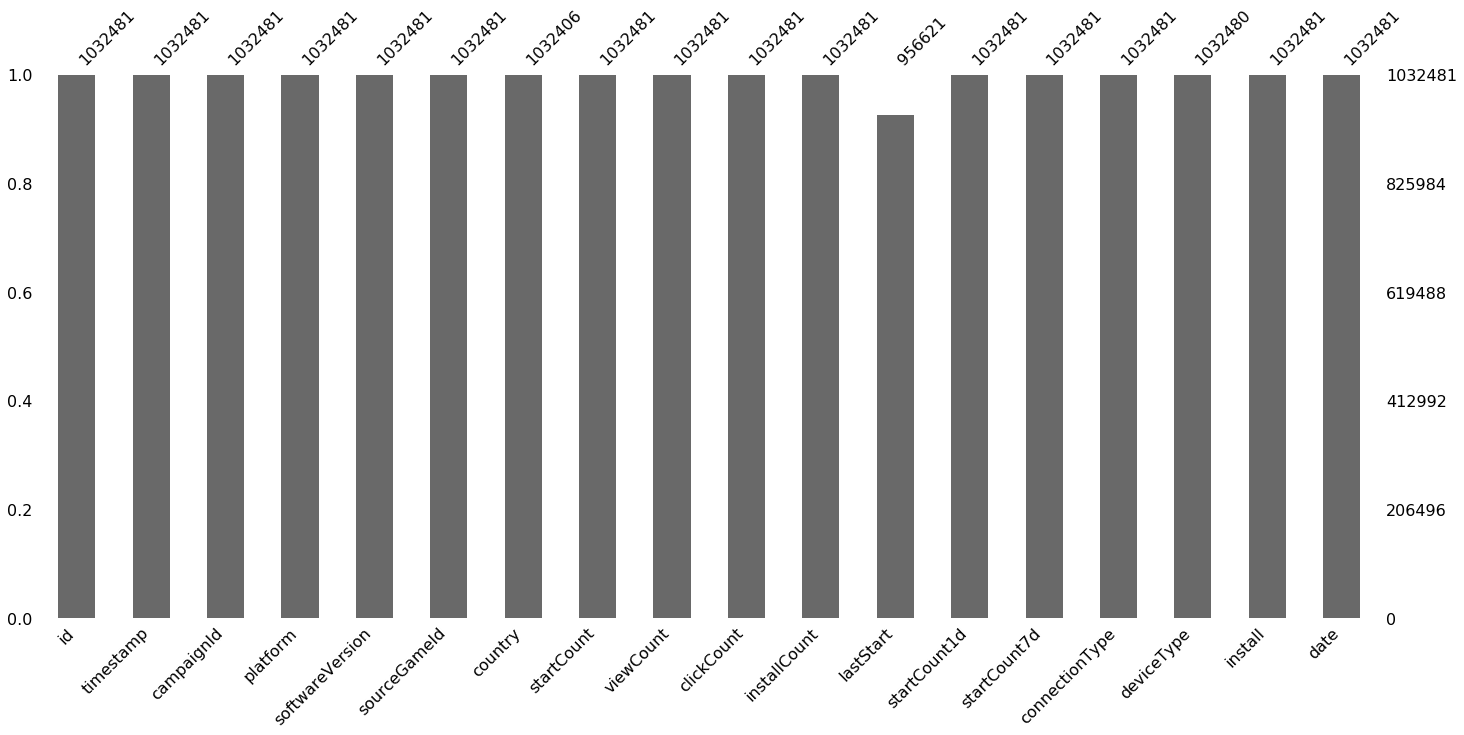

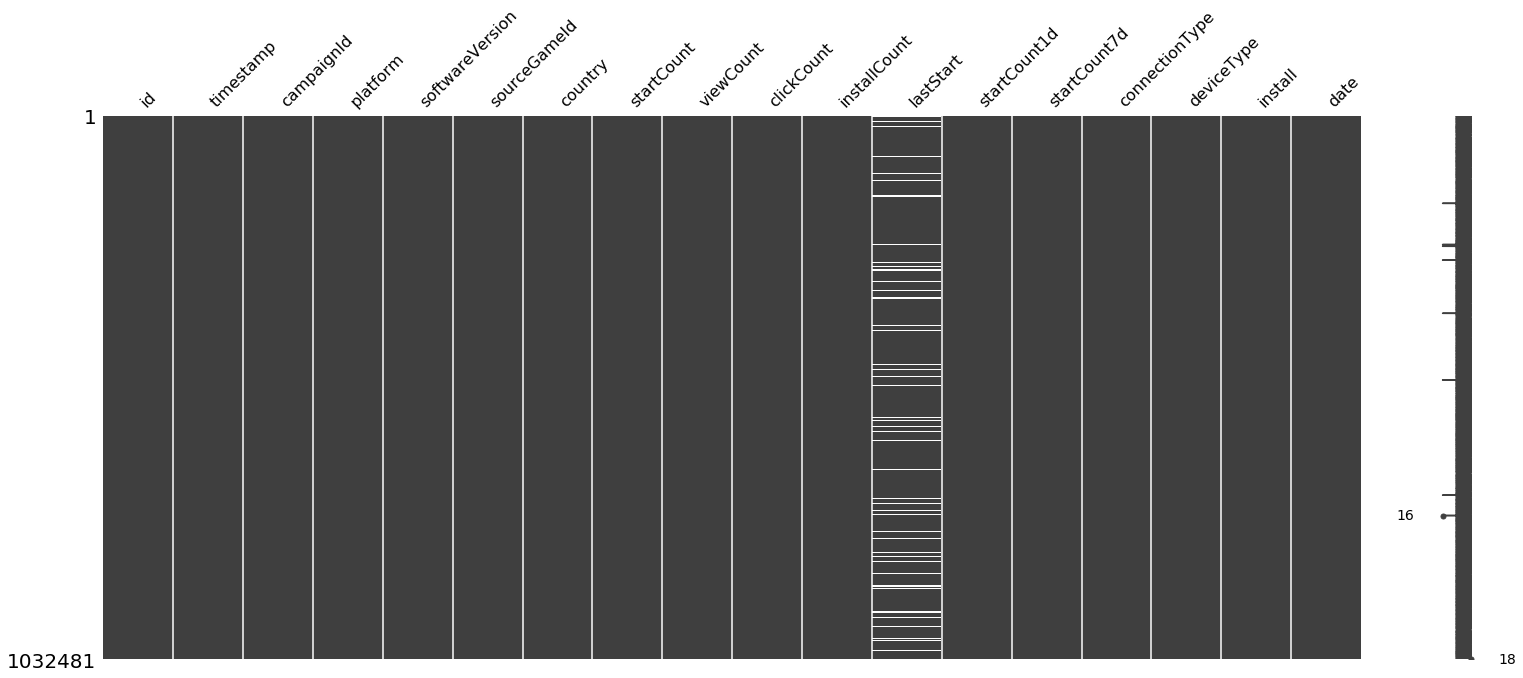

In [299]:
display(msno.bar(dat_train))
display(msno.matrix(dat_train))

In [322]:
dat_train['lastStartHours'] = (dat_train['timestamp']-dat_train['lastStart'])/np.timedelta64(1,'h')
dat_train['lastStartHours'].fillna(0,inplace=True)
dat_train['month'] = dat_train['timestamp'].dt.month
dat_train['day'] = dat_train['timestamp'].dt.dayofweek
dat_train['hour'] = dat_train['timestamp'].dt.hour

In [323]:
#dropping columns I'm not going to need
#all observations take place in january
print(np.all(dat_train.month==1))
X = dat_train.drop(columns=['lastStart', 'month'])

True


In [324]:
#one hot encoding on category type
X = pd.get_dummies(X, columns=['connectionType', 'platform']) #campainId excluded because not enough resources for cardinality

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,...,startCount1d,startCount7d,connectionType,deviceType,install,date,lastStartHours,month,day,hour
0,5c41ba4c99051c0b374fb417,2019-01-18 11:36:44.503,5bd2b810eb4bb3b817722baa,android,6.0.1,2871898,IN,3,2,1,...,3,3,cellular,vivo vivo 1606,0,1547811404503000000,0.020201,1,4,11
1,5c3aa751b1a3c01b4ac1bfe9,2019-01-13 02:49:53.282,5c35c9c4585c519bf6ed6250,ios,12.1.2,106156,CN,50,48,0,...,1,1,wifi,"iPhone9,2",0,1547347793282000000,280.644764,1,6,2


,sourceGameId,startCount,viewCount,clickCount,installCount,startCount1d,startCount7d,install,date,lastStartHours,month,day,hour
count,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1.032481e+06,1032481.0,1.032481e+06,1.032481e+06
mean,3.191072e+06,4.845875e+01,3.605175e+01,2.077464e+00,5.695446e-01,6.804151e+00,1.984489e+01,1.205155e-02,1.547483e+18,2.428325e+01,1.0,3.056793e+00,1.211963e+01
std,1.420909e+07,9.021888e+01,7.896515e+01,6.827185e+00,1.545144e+00,1.157733e+01,3.479096e+01,1.091161e-01,3.645079e+14,7.862590e+01,0.0,1.953387e+00,6.671756e+00
min,1.105500e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.546906e+18,0.000000e+00,1.0,0.000000e+00,0.000000e+00
25%,1.222943e+06,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,1.547148e+18,2.253000e-02,1.0,1.000000e+00,7.000000e+00
50%,1.632098e+06,1.900000e+01,1.000000e+01,0.000000e+00,0.000000e+00,3.000000e+00,9.000000e+00,0.000000e+00,1.547463e+18,1.011428e-01,1.0,3.000000e+00,1.300000e+01
75%,2.643690e+06,5.300000e+01,3.400000e+01,2.000000e+00,1.000000e+00,8.000000e+00,2.300000e+01,0.000000e+00,1.547820e+18,9.033967e+00,1.0,5.000000e+00,1.800000e+01
max,1.316274e+08,3.918000e+03,2.541000e+03,8.980000e+02,6.400000e+01,1.466000e+03,3.280000e+03,1.000000e+00,1.548115e+18,7.439663e+02,1.0,6.000000e+00,2.300000e+01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032481 entries, 0 to 1032481
Data columns (total 22 columns):
id                 1032481 non-null category
timestamp          1032481 non-null datetime64[ns]
campaignId         1032481 non-null category
platform           1032481 non-null category
softwareVersion    1032481 non-null category
sourceGameId       1032481 non-null int64
country            1032406 non-null category
startCount         1032481 non-null int64
viewCount          1032481 non-null int64
clickCount         1032481 non-null int64
installCount       1032481 non-null int64
lastStart          956621 non-null datetime64[ns]
startCount1d       1032481 non-null int64
startCount7d       1032481 non-null int64
connectionType     1032481 non-null category
deviceType         1032480 non-null category
install            1032481 non-null int8
date               1032481 non-null int64
lastStartHours     1032481 non-null float64
month              1032481 non-null int64
day     

None

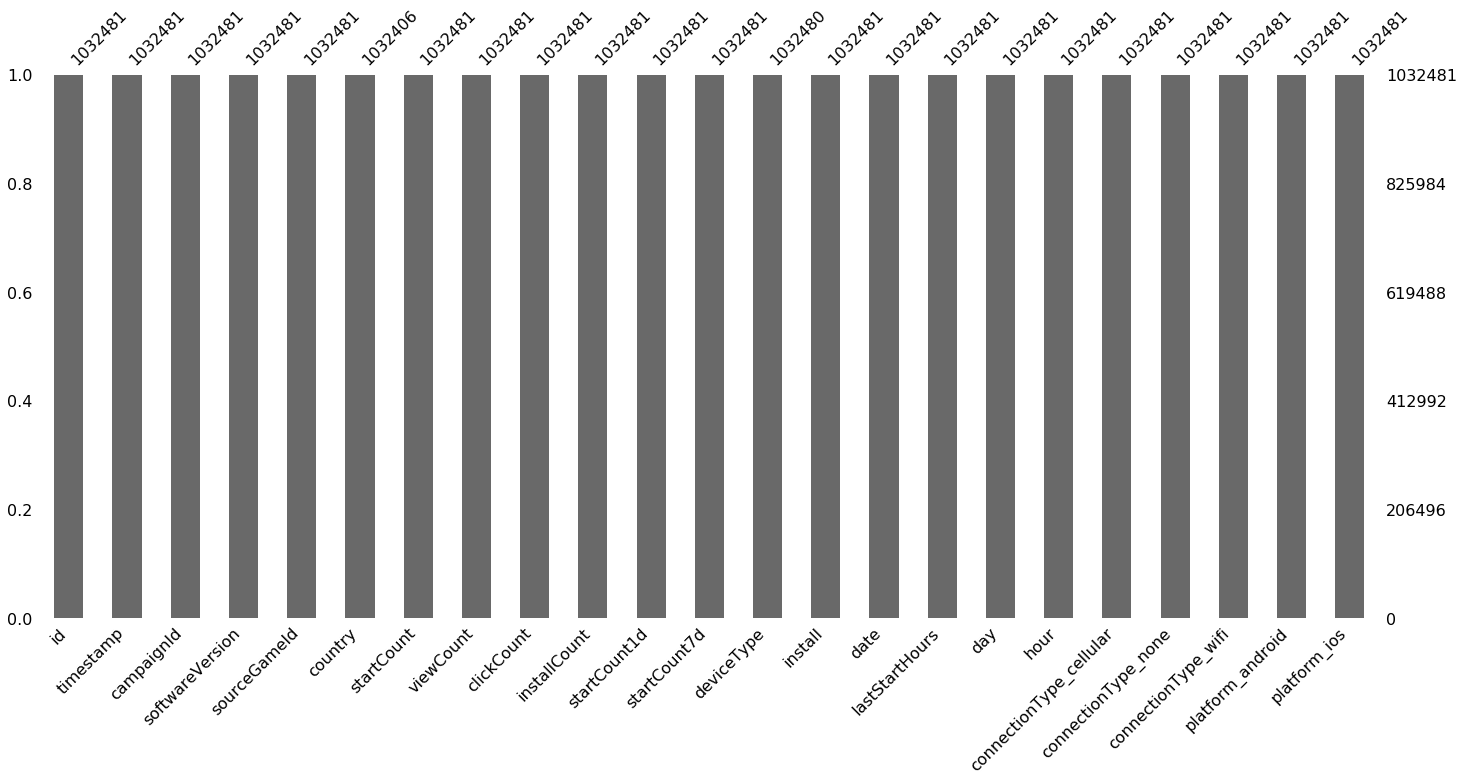

In [303]:
#Look at summary of data again
display(dat_train.head(2))
display(dat_train.describe())
display(dat_train.info())
display(msno.bar(X)) # much better

In [325]:
# May want to use country as a categorical variable and/or one-hotencoding
#Country still has missing values so I am making a column `country_n`
# we will be using label encoder on country's so we can't have any missing values
X['country_n'] = X.country.astype('object')
X['country_n'] = X['country_n'].fillna('0')

### Cardinality

The following columns have alot of unique values so we will compute the first few PCA's for them after onehot encoding
note: campaignId is in this list but it was not included PCA step because I would like to be able to interpret exactly
which campaing the resluts are coming from

In [326]:
PCA_cols = list()
L_cols = list()
for i in X.columns:
    if (X[i].unique().shape[0]>100) and (X[i].dtype not in [np.int64,np.int8,np.datetime64,np.float64]):
        L_cols.append(i)
    if (X[i].unique().shape[0]>100) and (X[i].dtype not in [np.int64,np.int8,np.datetime64,np.float64]) and i not in ['id','campaignId','timestamp', 'sourceGameId', 'deviceType']:
        PCA_cols.append(i)
        print(i)
        
# my device doesn't have the resources to compute to complete one hot encoding and pca with softwareVersion and deviceType so they will also be excuded

softwareVersion
country
country_n


In [327]:
#cardinaliry to high for my computer for the following columns
for i in L_cols:
    print(i+':', X[i].unique().shape)

id: (1113625,)
timestamp: (1113084,)
campaignId: (9480,)
softwareVersion: (146,)
country: (215,)
deviceType: (19252,)
country_n: (215,)


In [329]:
# for i in ['connectionType', 'platform', 'campaignId']:
#     x = pd.get_dummies(X[i])
#     X[x.columns] = x
from sklearn.decomposition import PCA

# list of # of pca for each column
n_pc=[5,12]

for i,j in zip(tqdm(PCA_cols),n_pc):
    x = pd.get_dummies(X[i])
    pca = PCA(n_components=j)
    Z = pca.fit_transform(x)
    print(i+':', pca.components_.shape)
    Z_dat = pd.DataFrame(Z, columns=[i+'_'+str(n) for n in np.arange(1,pca.components_.shape[0]+1)])
    X[Z_dat.columns] = Z_dat

  0%|          | 0/3 [00:00<?, ?it/s]

softwareVersion: (5, 146)


 33%|███▎      | 1/3 [00:14<00:28, 14.32s/it]

country: (12, 214)


 67%|██████▋   | 2/3 [00:39<00:19, 19.74s/it]

In [330]:
# takes long time so will use LabelEncoder
from sklearn.preprocessing import LabelEncoder

L = ['campaignId','softwareVersion', 'deviceType', 'country_n']
for i in tqdm(L):
    encoder = LabelEncoder()
    X[i] = encoder.fit_transform(X[i])

# TESTing OrdinalEncoder()
# import category_encoders as ce

# encoder = ce.OrdinalEncoder()
# Xsub = X['campaignId']
# X['campaignId'] = encoder.fit_transform(Xsub)

# encoder = ce.OrdinalEncoder()
# Xsub = X['connectionType']
# X['connectionType'] = encoder.fit_transform(Xsub)

# encoder = ce.OrdinalEncoder()
# Xsub = X['platform']
# X['platform'] = encoder.fit_transform(Xsub)

# encoder = ce.OrdinalEncoder()
# Xsub = X['deviceType']
# X['deviceType'] = encoder.fit_transform(Xsub)



100%|██████████| 4/4 [00:00<00:00,  7.54it/s]


One hotencoding:
'connectionType', 'platform'

one hot encoding + pca:
softwareVersion
country

labelencoder:
'campaignId', 'deviceType'

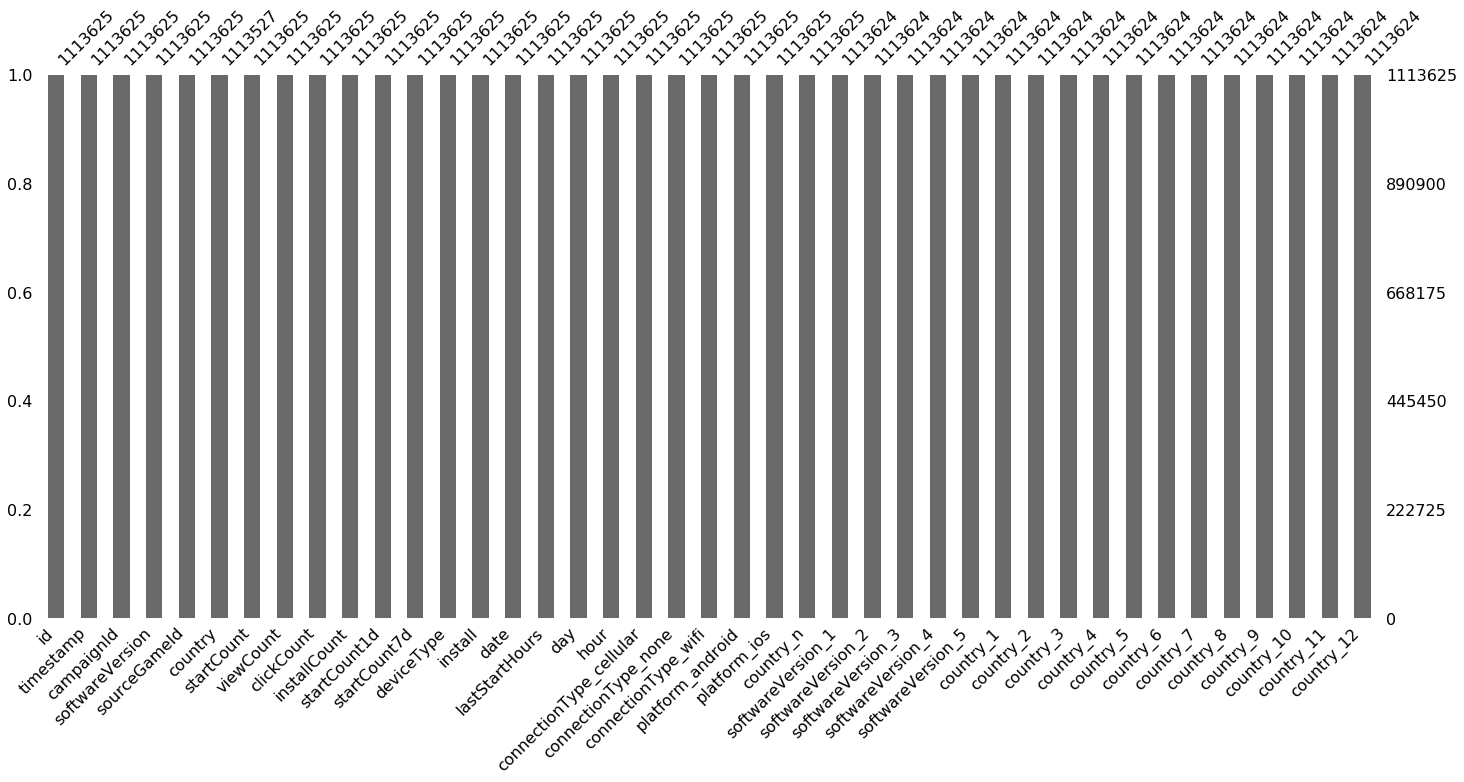

In [331]:
#missing values for PCAs
msno.bar(X)

In [332]:
df = X.drop(columns=['country'])
idx = df[df.isnull().any(axis=1)].index.values
display(df[df.isnull().any(axis=1)])
X.drop(index=idx, inplace=True)

,id,timestamp,campaignId,softwareVersion,sourceGameId,startCount,viewCount,clickCount,installCount,startCount1d,...,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12
1113625,5c460d901de1e5290d0f6235,2019-01-21 18:21:04.592,4309,37,2643941,16,5,0,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation amongts variables

(write something)

,timestamp,campaignId,softwareVersion,sourceGameId,startCount,viewCount,clickCount,installCount,startCount1d,startCount7d,...,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12
0,2019-01-09 17:29:21.624,3656,109,106382,2,0,0,0,2,2,...,-0.140515,-0.154872,-0.175688,-0.505433,0.707446,0.281368,-0.049932,-0.105261,-0.099568,-0.121693
1,2019-01-14 14:12:04.657,8084,83,1711292,9,7,0,0,9,9,...,-0.390127,0.860522,0.062067,0.007521,0.011178,0.016070,-0.004572,-0.013420,-0.018428,-0.033636
2,2019-01-09 04:07:26.209,2546,37,1580822,189,186,4,0,7,53,...,-0.081284,-0.066068,-0.032844,-0.006280,-0.010507,-0.015886,0.004564,0.015468,0.025745,0.062095
3,2019-01-19 01:11:48.247,5698,37,1148327,15,14,0,0,2,5,...,0.050043,0.025715,0.008060,0.001248,0.001903,0.002835,-0.000832,-0.002522,-0.003660,-0.007339
4,2019-01-18 19:04:42.728,8073,34,1305847,36,30,0,0,1,6,...,-0.108828,-0.100765,-0.064045,-0.015774,-0.025863,-0.043202,0.014213,0.049780,0.099176,0.636056


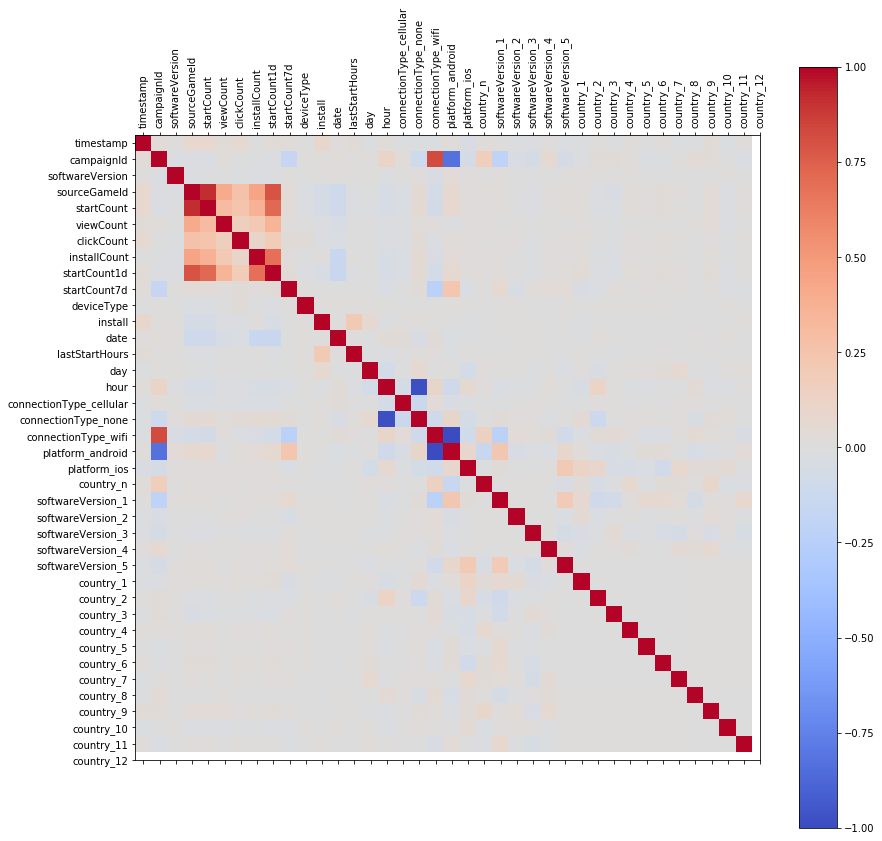

In [333]:
warnings.filterwarnings('ignore')
Xint = X.select_dtypes(include=[np.int64,np.int8,np.datetime64,np.float64,np.uint8])
Xint[['country_'+str(n) for n in range(1,13)]] = X[['country_'+str(n) for n in range(1,13)]]
Xint[['softwareVersion_'+str(n) for n in range(1,6)]] = X[['softwareVersion_'+str(n) for n in range(1,6)]]
display(Xint.head())

corr = Xint.corr()
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Xint.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Xint.columns)
ax.set_yticklabels(Xint.columns)
plt.show()

## Class balance

There is a class imbalance where the minority class is 1.2%. Made sure the sample I collected has the same porportions as the full data set. I am assuming this is the same proportion for `install` on the test set.

In [334]:
in_train = pd.read_csv('training_data.csv', engine='c', sep=';', usecols=['install'], squeeze=True)
inst = in_train[:1000]

In [335]:
print(X.install.mean())
print(in_train.mean())

0.012051644001925247
0.012005944748277065


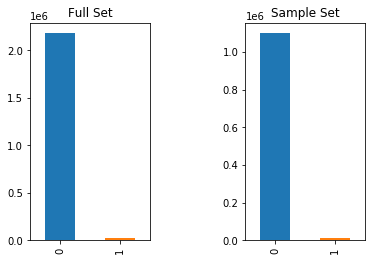

In [336]:
plt.subplot(1,2,1)
in_train.value_counts().plot(kind='bar', title='Full Set')
plt.title("Full Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.subplot(1,2,2)
X.install.value_counts().plot(kind='bar', title='Sample Set')
plt.title("Sample Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.subplots_adjust(wspace=0.8)
plt.show()

## Preliminary modeling

I want to see how models are performing before correcting imbalanced data

In [337]:
# set id as index
X.set_index('id', inplace=True)
#X.reset_index(inplace=True)

In [338]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import ShuffleSplit

In [642]:
# sample data to run on modles due to limit computing resources
df = X.sample(20000)

In [643]:
#validation and testing set
Xtrain, X_valid, ytrain, y_valid = train_test_split(df.drop(columns=['install', 'country','softwareVersion', 'timestamp']), df.install, test_size=0.30) # random state

In [163]:
def Learn(cw=None):
    warnings.filterwarnings('ignore')
    valData = list()
    trainData = list()
    selectedFeature = list()
    Feat = list()
    index = list()
    recall = list()
    f1 = list()
    precision = list()

    # Set some threshold
    threshold = 1e-6

    # A dictionary to hold the estimators
    classifiers = {
        'LogisticRegression (L1)': 
                (1, LogisticRegression(max_iter=200, 
                                       penalty = "l1", class_weight=cw)),
        'LogisticRegression (EL)': 
                (2, LogisticRegression(max_iter=200, 
                                       penalty = "elasticnet", class_weight=cw, solver='saga', l1_ratio=0.5)),
        'Decision Tree (CART)':
                (3, DecisionTreeClassifier(class_weight=cw)),
        'MLP':
                (4, MLPClassifier())
    }

    for classifier_name, (idx, classifier_obj) in tqdm(classifiers.items()):
        classifier_obj.fit(Xtrain, ytrain)
        valData.append(classifier_obj.score(X_valid, y_valid))
        trainData.append(classifier_obj.score(Xtrain, ytrain))
        index.append(classifier_name)
        if classifier_name=='Decision Tree (CART)':
            normfeatures = ''
            features = np.argsort(-classifier_obj.feature_importances_).tolist()
            selectedFeature.append(features)
            Feat.append(Xtrain.columns[np.argsort(-classifier_obj.feature_importances_)].tolist())
        elif classifier_name=='MLP':
            normfeatures = ''
            features = ''
            selectedFeature.append('')
            Feat.append(Xtrain.columns.tolist())
        else:    
            normfeatures = np.abs(classifier_obj.coef_[0])/np.max(classifier_obj.coef_[0])
            features = np.where(normfeatures > threshold)[0]
            selectedFeature.append(features)
            Feat.append(Xtrain.columns[features].tolist())

        # make predictions
        expected = y_valid
        predicted = classifier_obj.predict(X_valid)
        # summarize the fit of the model
        print('************'+classifier_name+'************')
        print('Confusion Matrix')
        print(confusion_matrix(expected, predicted))
        report = classification_report(expected, predicted, output_dict=True)
        recall.append(report['1']['recall'])
        f1.append(report['1']['f1-score'])
        precision.append(report['1']['precision'])

    df = pd.DataFrame(valData, index = index, columns=['Validation score'])
    df['Training Score'] = trainData
    df['Recall'] = recall
    df['F1'] = f1
    df['Precision'] = precision
    df['Selected features'] = Feat
    df['Feature Idx'] = selectedFeature
    df['#Features'] = [len(val) for val in Feat]
    return df
Learn()

 50%|█████     | 2/4 [01:55<01:55, 57.64s/it] 

************LogisticRegression (L1)************
Confusion Matrix
[[5914    0]
 [  86    0]]
************LogisticRegression (EL)************
Confusion Matrix
[[5914    0]
 [  86    0]]


 75%|███████▌  | 3/4 [01:55<00:38, 38.49s/it]

************Decision Tree (CART)************
Confusion Matrix
[[5814  100]
 [  83    3]]


100%|██████████| 4/4 [02:05<00:00, 31.29s/it]

************MLP************
Confusion Matrix
[[5914    0]
 [  86    0]]


,Validation score,Training Score,Recall,F1,Precision,Selected features,Feature Idx,#Features
LogisticRegression (L1),0.985667,0.988786,0.000000,0.000000,0.000000,"[campaignId, startCount, viewCount, clickCount...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15, 16, 1...",25
LogisticRegression (EL),0.985667,0.988786,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",33
Decision Tree (CART),0.969500,1.000000,0.034884,0.031746,0.029126,"[date, sourceGameId, lastStartHours, deviceTyp...","[9, 1, 10, 8, 12, 0, 3, 6, 18, 22, 2, 35, 34, ...",36
MLP,0.985667,0.988786,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...",,36


## Adjusting Class Weights

In [164]:
Learn(cw={0:.1, 1:.9})

 50%|█████     | 2/4 [01:57<01:57, 58.60s/it] 

************LogisticRegression (L1)************
Confusion Matrix
[[5913    1]
 [  86    0]]
************LogisticRegression (EL)************
Confusion Matrix
[[5914    0]
 [  86    0]]


 75%|███████▌  | 3/4 [01:57<00:39, 39.14s/it]

************Decision Tree (CART)************
Confusion Matrix
[[5820   94]
 [  86    0]]


100%|██████████| 4/4 [02:06<00:00, 31.69s/it]

************MLP************
Confusion Matrix
[[5914    0]
 [  86    0]]


,Validation score,Training Score,Recall,F1,Precision,Selected features,Feature Idx,#Features
LogisticRegression (L1),0.985500,0.988429,0.0,0.0,0.0,"[campaignId, startCount, viewCount, clickCount...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15, 16, 1...",24
LogisticRegression (EL),0.985667,0.988786,0.0,0.0,0.0,"[campaignId, sourceGameId, startCount, viewCou...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",32
Decision Tree (CART),0.970000,1.000000,0.0,0.0,0.0,"[date, lastStartHours, country_n, campaignId, ...","[9, 10, 18, 0, 8, 3, 7, 5, 1, 2, 12, 28, 20, 6...",36
MLP,0.985667,0.988786,0.0,0.0,0.0,"[campaignId, sourceGameId, startCount, viewCou...",,36


## Resampling

In [341]:
from imblearn.combine import SMOTETomek

print('Shape of Training set before sampling:', Xtrain.shape)
print('Proportion of install=1:', np.mean(ytrain))
print('')
col = Xtrain.columns

smt = SMOTETomek()
Xtrain, ytrain = smt.fit_sample(Xtrain, ytrain)

Xtrain = pd.DataFrame(Xtrain, columns=col)
print('Shape of Training set after sampling:', Xtrain.shape)
print('Proportion of install=1:', np.mean(ytrain))

Shape of Training set before sampling: (14000, 36)
Proportion of install=1: 0.012714285714285714

Shape of Training set after sampling: (20524, 36)
Proportion of install=1: 0.5


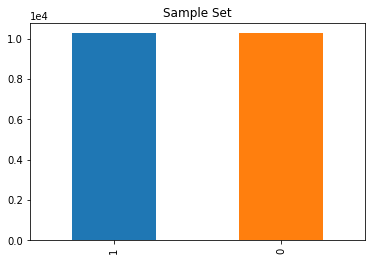

In [342]:
pd.Series(ytrain).value_counts().plot(kind='bar', title='Count (target)', stacked=True)
plt.title("Sample Set")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

In [167]:
display(Learn())
display(Learn(cw={0:.1, 1:.9}))
display(Learn(cw={0:.01, 1:.99}))
display(Learn(cw={0:.001, 1:.999}))

 25%|██▌       | 1/4 [03:01<09:04, 181.52s/it]

************LogisticRegression (L1)************
Confusion Matrix
[[3437 2477]
 [  46   40]]


 50%|█████     | 2/4 [03:03<03:03, 91.89s/it] 

************LogisticRegression (EL)************
Confusion Matrix
[[5914    0]
 [  86    0]]


 75%|███████▌  | 3/4 [03:04<01:01, 61.38s/it]

************Decision Tree (CART)************
Confusion Matrix
[[5793  121]
 [  84    2]]


100%|██████████| 4/4 [03:29<00:00, 52.42s/it]

************MLP************
Confusion Matrix
[[5914    0]
 [  86    0]]


,Validation score,Training Score,Recall,F1,Precision,Selected features,Feature Idx,#Features
LogisticRegression (L1),0.579500,0.643229,0.465116,0.030734,0.015892,"[campaignId, startCount, viewCount, clickCount...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...",33
LogisticRegression (EL),0.985667,0.500000,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",36
Decision Tree (CART),0.965833,1.000000,0.023256,0.019139,0.016260,"[clickCount, installCount, connectionType_cell...","[4, 5, 13, 16, 17, 24, 2, 9, 3, 35, 19, 6, 28,...",36
MLP,0.985667,0.500000,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...",,36


  0%|          | 0/4 [00:00<?, ?it/s]

************LogisticRegression (L1)************
Confusion Matrix
[[ 373 5541]
 [   6   80]]
************LogisticRegression (EL)************
Confusion Matrix


 50%|█████     | 2/4 [00:00<00:00,  6.78it/s]

[[   0 5914]
 [   0   86]]


 75%|███████▌  | 3/4 [00:01<00:00,  2.74it/s]

************Decision Tree (CART)************
Confusion Matrix
[[5767  147]
 [  80    6]]


100%|██████████| 4/4 [00:32<00:00,  8.04s/it]

************MLP************
Confusion Matrix
[[5914    0]
 [  86    0]]


,Validation score,Training Score,Recall,F1,Precision,Selected features,Feature Idx,#Features
LogisticRegression (L1),0.075500,0.535967,0.930233,0.028036,0.014232,"[campaignId, startCount, viewCount, clickCount...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 1...",32
LogisticRegression (EL),0.014333,0.500000,1.000000,0.028262,0.014333,[date],[9],1
Decision Tree (CART),0.962167,1.000000,0.069767,0.050209,0.039216,"[date, softwareVersion_2, clickCount, country_...","[9, 20, 4, 28, 22, 21, 24, 25, 2, 8, 3, 19, 29...",36
MLP,0.985667,0.500000,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...",,36


 50%|█████     | 2/4 [02:55<02:55, 87.77s/it] 

************LogisticRegression (L1)************
Confusion Matrix
[[ 184 5730]
 [   2   84]]
************LogisticRegression (EL)************
Confusion Matrix
[[   0 5914]
 [   0   86]]


 75%|███████▌  | 3/4 [02:57<00:59, 59.08s/it]

************Decision Tree (CART)************
Confusion Matrix
[[5780  134]
 [  83    3]]


100%|██████████| 4/4 [03:26<00:00, 51.60s/it]

************MLP************
Confusion Matrix
[[5914    0]
 [  86    0]]


,Validation score,Training Score,Recall,F1,Precision,Selected features,Feature Idx,#Features
LogisticRegression (L1),0.044667,0.516683,0.976744,0.028475,0.014448,"[campaignId, startCount, viewCount, clickCount...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 1...",27
LogisticRegression (EL),0.014333,0.500000,1.000000,0.028262,0.014333,[date],[9],1
Decision Tree (CART),0.963833,1.000000,0.034884,0.026906,0.021898,"[deviceType, lastStartHours, hour, sourceGameI...","[8, 10, 12, 1, 0, 18, 11, 3, 4, 35, 7, 9, 29, ...",36
MLP,0.985667,0.500000,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...",,36


 25%|██▌       | 1/4 [02:50<08:30, 170.08s/it]

************LogisticRegression (L1)************
Confusion Matrix
[[5583  331]
 [  82    4]]


 50%|█████     | 2/4 [02:50<02:50, 85.16s/it] 

************LogisticRegression (EL)************
Confusion Matrix
[[5914    0]
 [  86    0]]


 75%|███████▌  | 3/4 [02:50<00:56, 56.89s/it]

************Decision Tree (CART)************
Confusion Matrix
[[5795  119]
 [  84    2]]


100%|██████████| 4/4 [03:18<00:00, 49.65s/it]

************MLP************
Confusion Matrix
[[5914    0]
 [  86    0]]


,Validation score,Training Score,Recall,F1,Precision,Selected features,Feature Idx,#Features
LogisticRegression (L1),0.931167,0.517615,0.046512,0.019002,0.011940,"[campaignId, startCount, viewCount, clickCount...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 1...",30
LogisticRegression (EL),0.985667,0.500000,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",36
Decision Tree (CART),0.966167,1.000000,0.023256,0.019324,0.016529,"[clickCount, installCount, connectionType_cell...","[4, 5, 13, 16, 17, 24, 9, 3, 2, 20, 30, 35, 28...",36
MLP,0.985667,0.500000,0.000000,0.000000,0.000000,"[campaignId, sourceGameId, startCount, viewCou...",,36


## Hyperparameter Optimization

Now that we have an idea how each model perfoms

In [343]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import random
from time import time

In [344]:
# Utility function to report best scores
def report(results, n_top=3, random_search=random_search, testy=testy):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    probs = random_search.best_estimator_.predict_proba(X_valid)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    yhat = random_search.best_estimator_.predict(X_valid)
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # calculate F1 score
    f1 = f1_score(testy, yhat)
    # calculate precision-recall AUC
    au = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(testy, probs)
    print('Precision:', precision)
    print('Recall:   ', recall)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, au, ap))
    # plot no skill
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()
    print(classification_report(testy, yhat))
    print('Confusion Matrix')
    print(confusion_matrix(testy, yhat))
    print('')
    print('')

***************** RECALL *****************
RandomizedSearchCV took 61.87 seconds for 40 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.992 (std: 0.014)
Parameters: {'max_depth': 11, 'max_features': 28, 'min_samples_split': 23}

Model with rank: 2
Mean validation score: 0.991 (std: 0.012)
Parameters: {'max_depth': 9, 'max_features': 35, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.991 (std: 0.014)
Parameters: {'max_depth': 12, 'max_features': 12, 'min_samples_split': 15}

Model with rank: 3
Mean validation score: 0.991 (std: 0.015)
Parameters: {'max_depth': 13, 'max_features': 21, 'min_samples_split': 14}

Precision: [0.01333333 0.01208285 0.01258993 0.01267351 0.01278928 0.01228501
 0.01234568 0.01242236 0.01188986 0.01199495 0.01204056 0.01211735
 0.01217168 0.0121873  0.01228978 0.01232966 0.0124427  0.0125
 0.01253298 0.01194426 0.01196809 0.01197605 0.         0.
 0.         0.         1.        ]
Recall:    [1.         0.35      

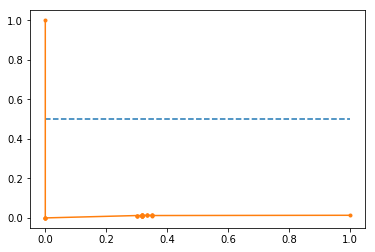

              precision    recall  f1-score   support

           0       0.99      0.64      0.78      4440
           1       0.01      0.33      0.02        60

    accuracy                           0.64      4500
   macro avg       0.50      0.49      0.40      4500
weighted avg       0.97      0.64      0.77      4500

Confusion Matrix
[[2850 1590]
 [  40   20]]
***************** F1 *****************
RandomizedSearchCV took 110.47 seconds for 40 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.967 (std: 0.006)
Parameters: {'max_depth': 33, 'max_features': 8, 'min_samples_split': 13}

Model with rank: 2
Mean validation score: 0.966 (std: 0.012)
Parameters: {'max_depth': 33, 'max_features': 32, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.964 (std: 0.007)
Parameters: {'max_depth': 34, 'max_features': 25, 'min_samples_split': 12}

Precision: [0.01333333 0.0125     0.01276596 0.01333333 0.01395349 0.01470588
 0.01515152 0.01554404 0.0

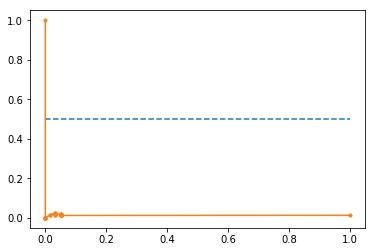

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4440
           1       0.01      0.05      0.02        60

    accuracy                           0.94      4500
   macro avg       0.50      0.50      0.49      4500
weighted avg       0.97      0.94      0.96      4500

Confusion Matrix
[[4218  222]
 [  57    3]]


In [124]:
model = DecisionTreeClassifier(class_weight={0:.1, 1:.9})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(7, 35),
              "max_features": sp_randint(7, 37),
              "min_samples_split": sp_randint(2, 25)}

# run randomized search
n_iter_search = 40

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)


***************** RECALL *****************
RandomizedSearchCV took 58.72 seconds for 40 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.997 (std: 0.005)
Parameters: {'max_depth': 7, 'max_features': 28, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.997 (std: 0.006)
Parameters: {'max_depth': 9, 'max_features': 16, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.996 (std: 0.007)
Parameters: {'max_depth': 11, 'max_features': 28, 'min_samples_split': 11}

Precision: [0.01333333 0.01214575 0.01169766 0.01197789 0.01178295 0.01180858
 0.         0.         1.        ]
Recall:    [1.         0.7        0.65       0.65       0.63333333 0.63333333
 0.         0.         0.        ]
f1=0.023 auc=0.008 ap=0.012


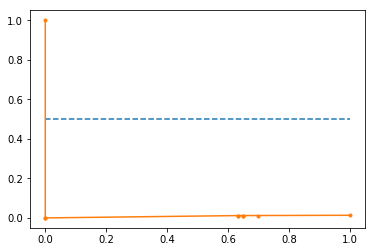

              precision    recall  f1-score   support

           0       0.98      0.26      0.41      4440
           1       0.01      0.65      0.02        60

    accuracy                           0.26      4500
   macro avg       0.50      0.45      0.22      4500
weighted avg       0.97      0.26      0.40      4500

Confusion Matrix
[[1145 3295]
 [  21   39]]


***************** F1 *****************
RandomizedSearchCV took 59.49 seconds for 40 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.896 (std: 0.006)
Parameters: {'max_depth': 34, 'max_features': 20, 'min_samples_split': 18}

Model with rank: 2
Mean validation score: 0.879 (std: 0.005)
Parameters: {'max_depth': 30, 'max_features': 14, 'min_samples_split': 15}

Model with rank: 3
Mean validation score: 0.864 (std: 0.004)
Parameters: {'max_depth': 28, 'max_features': 20, 'min_samples_split': 18}

Precision: [0.01333333 0.01317123 0.01319797 0.01330604 0.0125261  0.01259182
 0.01349831 0.01369863 

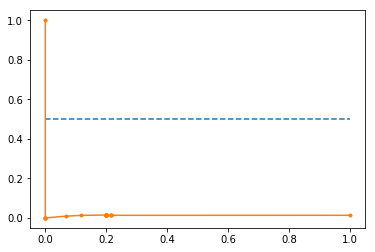

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      4440
           1       0.01      0.22      0.02        60

    accuracy                           0.77      4500
   macro avg       0.50      0.50      0.45      4500
weighted avg       0.97      0.77      0.86      4500

Confusion Matrix
[[3466  974]
 [  47   13]]




In [135]:
model = DecisionTreeClassifier(class_weight={0:.01, 1:.99})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(7, 35),
              "max_features": sp_randint(7, 37),
              "min_samples_split": sp_randint(2, 25)}

# run randomized search
n_iter_search = 40


for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 61.78 seconds for 40 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.998 (std: 0.003)
Parameters: {'max_depth': 7, 'max_features': 10, 'min_samples_split': 23}

Model with rank: 2
Mean validation score: 0.997 (std: 0.006)
Parameters: {'max_depth': 8, 'max_features': 27, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.997 (std: 0.006)
Parameters: {'max_depth': 9, 'max_features': 31, 'min_samples_split': 8}

Precision: [0.01333333 0.01214128 0.01105651 0.01169591 0.01178782 0.01183821
 0.01185771 0.01186944 0.01190476 1.        ]
Recall:    [1.         0.73333333 0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.        ]
f1=0.022 auc=0.309 ap=0.012


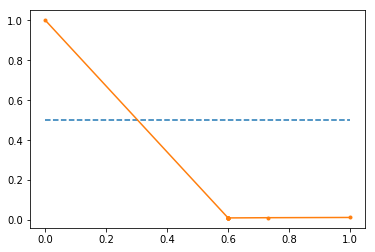

***************** F1 *****************
RandomizedSearchCV took 61.93 seconds for 40 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.900 (std: 0.015)
Parameters: {'max_depth': 32, 'max_features': 10, 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.893 (std: 0.003)
Parameters: {'max_depth': 33, 'max_features': 33, 'min_samples_split': 18}

Model with rank: 3
Mean validation score: 0.892 (std: 0.005)
Parameters: {'max_depth': 33, 'max_features': 35, 'min_samples_split': 10}

Precision: [0.01333333 0.01493931 0.01498127 0.01500938 0.0162767  0.01632653
 0.0164271  0.01647786 0.01658031 0.0167364  0.01684211 0.01691332
 0.01698514 0.01702128 0.01709402 0.01627907 0.         0.
 0.         0.         1.        ]
Recall:    [1.         0.26666667 0.26666667 0.26666667 0.26666667 0.26666667
 0.26666667 0.26666667 0.26666667 0.26666667 0.26666667 0.26666667
 0.26666667 0.26666667 0.26666667 0.23333333 0.         0.
 0.         0.         0.       

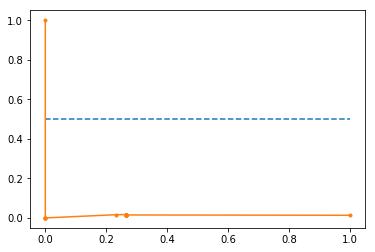

In [122]:
model = DecisionTreeClassifier(class_weight={0:.01, 1:.99})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(7, 35),
              "max_features": sp_randint(7, 37),
              "min_samples_split": sp_randint(2, 25)}

# run randomized search
n_iter_search = 40

print('***************** RECALL *****************')
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False, scoring='recall')
start = time()
random_search.fit(Xtrain, ytrain)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

print('***************** F1 *****************')
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False, scoring='f1')

start = time()
random_search.fit(Xtrain, ytrain)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

In [ ]:
f1=0.027 auc=0.015 ap=0.015

***************** RECALL *****************
RandomizedSearchCV took 202.95 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 1.5181260926601206}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 0.550864009365152}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 0.7659336302018196}

Precision: [0.0134499  0.0132287  0.01323167 ... 0.         0.         1.        ]
Recall:    [1.         0.98333333 0.98333333 ... 0.         0.         0.        ]
f1=0.027 auc=0.014 ap=0.015


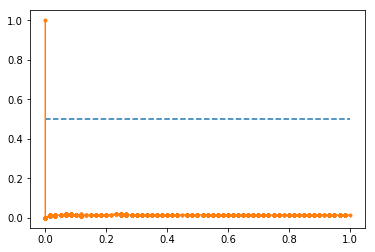

              precision    recall  f1-score   support

           0       0.99      0.10      0.18      4440
           1       0.01      0.93      0.03        60

    accuracy                           0.11      4500
   macro avg       0.50      0.51      0.10      4500
weighted avg       0.98      0.11      0.17      4500

Confusion Matrix
[[ 428 4012]
 [   4   56]]


***************** F1 *****************
RandomizedSearchCV took 224.71 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.689 (std: 0.002)
Parameters: {'C': 1.8189871989843085}

Model with rank: 2
Mean validation score: 0.689 (std: 0.002)
Parameters: {'C': 1.5656133911183252}

Model with rank: 3
Mean validation score: 0.687 (std: 0.001)
Parameters: {'C': 0.8850180671890198}

Precision: [0.01344387 0.01322277 0.01322573 ... 0.         0.         1.        ]
Recall:    [1.         0.98333333 0.98333333 ... 0.         0.         0.        ]
f1=0.027 auc=0.014 ap=0.015


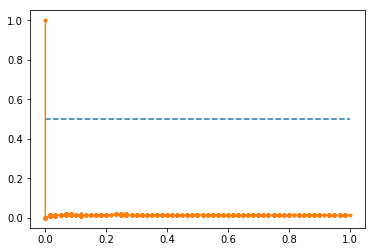

              precision    recall  f1-score   support

           0       0.99      0.10      0.18      4440
           1       0.01      0.93      0.03        60

    accuracy                           0.11      4500
   macro avg       0.50      0.52      0.10      4500
weighted avg       0.98      0.11      0.17      4500

Confusion Matrix
[[ 431 4009]
 [   4   56]]




In [136]:
model = LogisticRegression(max_iter=100, penalty = "l1", class_weight={0:.1, 1:.9})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"C":  uniform(0.01,2)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 283.47 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 1.6134321785541583}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 1.0907568092129645}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'C': 0.3545043318805634}

Precision: [0.00991994 0.00974761 0.0097493  ... 0.         0.         1.        ]
Recall:    [1.         0.98245614 0.98245614 ... 0.         0.         0.        ]
f1=0.019 auc=0.016 ap=0.017


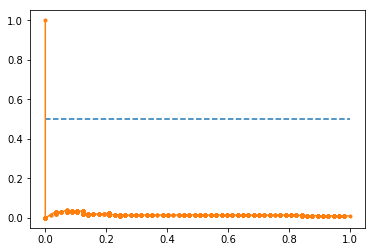

              precision    recall  f1-score   support

           0       1.00      0.04      0.08      5943
           1       0.01      0.98      0.02        57

    accuracy                           0.05      6000
   macro avg       0.50      0.51      0.05      6000
weighted avg       0.99      0.05      0.08      6000

Confusion Matrix
[[ 261 5682]
 [   1   56]]


***************** F1 *****************


KeyboardInterrupt: 

In [160]:
model = LogisticRegression(max_iter=100, penalty = "l1", class_weight={0:.01, 1:.99})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"C":  uniform(0.01,2)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

## Ensamble

In [223]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

In [ ]:
{'max_depth': 11, 'max_features': 28, 'min_samples_split': 23}  {'max_depth': 34, 'max_features': 20, 'min_samples_split': 18} {'max_depth': 7, 'max_features': 10, 'min_samples_split': 23}

DecisionTreeC.params_=

***************** RECALL *****************
RandomizedSearchCV took 26.65 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.012)
Parameters: {'n_estimators': 124}

Model with rank: 2
Mean validation score: 0.987 (std: 0.013)
Parameters: {'n_estimators': 149}

Model with rank: 3
Mean validation score: 0.987 (std: 0.013)
Parameters: {'n_estimators': 181}

Precision: [0.01455161 0.01438484 0.01438727 ... 0.         0.         1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.         0.         0.        ]
f1=0.024 auc=0.017 ap=0.017


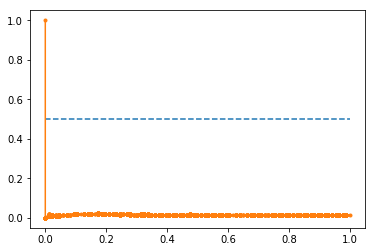

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5914
           1       0.01      0.07      0.02        86

    accuracy                           0.92      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.97      0.92      0.94      6000

Confusion Matrix
[[5515  399]
 [  80    6]]


***************** F1 *****************
RandomizedSearchCV took 25.65 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.971 (std: 0.015)
Parameters: {'n_estimators': 174}

Model with rank: 2
Mean validation score: 0.963 (std: 0.021)
Parameters: {'n_estimators': 122}

Model with rank: 3
Mean validation score: 0.926 (std: 0.023)
Parameters: {'n_estimators': 69}

Precision: [0.01454915 0.0143824  0.01438484 ... 0.         0.         1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.         0.         0.        ]
f1=0.038 auc=0.018 ap=0.019


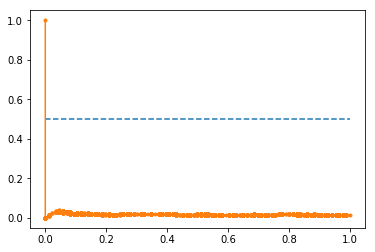

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5914
           1       0.02      0.08      0.04        86

    accuracy                           0.94      6000
   macro avg       0.51      0.52      0.50      6000
weighted avg       0.97      0.94      0.96      6000

Confusion Matrix
[[5637  277]
 [  79    7]]




In [178]:
m = DecisionTreeClassifier( class_weight={0: 0.1, 1: 0.9}, max_depth=1, max_features=28, min_samples_split=23)
model = AdaBoostClassifier(m)
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"n_estimators":  sp_randint(20,200)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 33.00 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.987 (std: 0.011)
Parameters: {'n_estimators': 154}

Model with rank: 2
Mean validation score: 0.987 (std: 0.011)
Parameters: {'n_estimators': 146}

Model with rank: 2
Mean validation score: 0.987 (std: 0.011)
Parameters: {'n_estimators': 100}

Precision: [0.01435726 0.01419269 0.01419506 ... 0.         0.         1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.         0.         0.        ]
f1=0.034 auc=0.017 ap=0.017


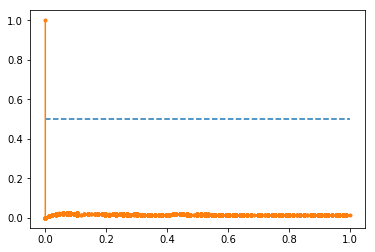

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5914
           1       0.02      0.06      0.03        86

    accuracy                           0.95      6000
   macro avg       0.50      0.51      0.50      6000
weighted avg       0.97      0.95      0.96      6000

Confusion Matrix
[[5708  206]
 [  81    5]]


***************** F1 *****************
RandomizedSearchCV took 36.97 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.985 (std: 0.003)
Parameters: {'n_estimators': 173}

Model with rank: 2
Mean validation score: 0.984 (std: 0.004)
Parameters: {'n_estimators': 174}

Model with rank: 3
Mean validation score: 0.969 (std: 0.019)
Parameters: {'n_estimators': 91}

Precision: [0.01461591 0.01444841 0.01445087 ... 0.         0.         1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.         0.         0.        ]
f1=0.026 auc=0.021 ap=0.022


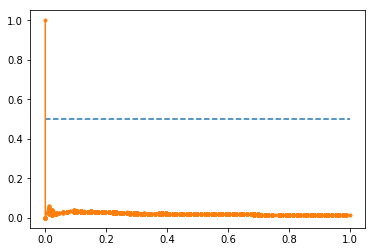

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5914
           1       0.02      0.03      0.03        86

    accuracy                           0.96      6000
   macro avg       0.50      0.51      0.50      6000
weighted avg       0.97      0.96      0.97      6000

Confusion Matrix
[[5772  142]
 [  83    3]]




In [179]:
m = DecisionTreeClassifier( class_weight={0: 0.01, 1: 0.99}, max_depth=2, max_features=20, min_samples_split=18)
model = AdaBoostClassifier(m)
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"n_estimators":  sp_randint(20,200)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 7.68 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.998 (std: 0.002)
Parameters: {'n_estimators': 49}

Model with rank: 2
Mean validation score: 0.993 (std: 0.007)
Parameters: {'n_estimators': 98}

Model with rank: 3
Mean validation score: 0.990 (std: 0.010)
Parameters: {'n_estimators': 152}

Precision: [0.0143909  0.01422594 0.01422832 ... 0.         0.         1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.         0.         0.        ]
f1=0.031 auc=0.018 ap=0.019


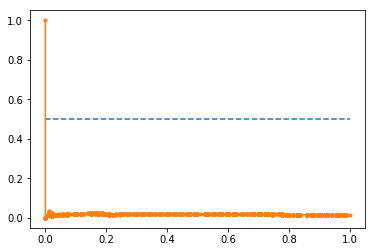

              precision    recall  f1-score   support

           0       0.99      0.19      0.32      5914
           1       0.02      0.90      0.03        86

    accuracy                           0.20      6000
   macro avg       0.50      0.54      0.17      6000
weighted avg       0.98      0.20      0.31      6000

Confusion Matrix
[[1110 4804]
 [   9   77]]


***************** F1 *****************
RandomizedSearchCV took 7.87 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.808 (std: 0.071)
Parameters: {'n_estimators': 101}

Model with rank: 2
Mean validation score: 0.797 (std: 0.056)
Parameters: {'n_estimators': 94}

Model with rank: 3
Mean validation score: 0.719 (std: 0.015)
Parameters: {'n_estimators': 49}

Precision: [0.01458369 0.01441655 0.01424936 ... 0.         0.         1.        ]
Recall:    [1.         0.98837209 0.97674419 ... 0.         0.         0.        ]
f1=0.033 auc=0.018 ap=0.019


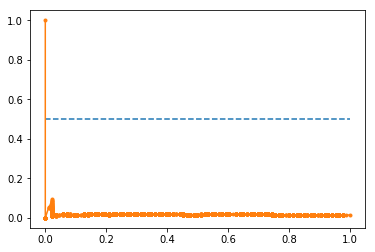

              precision    recall  f1-score   support

           0       0.99      0.37      0.54      5914
           1       0.02      0.74      0.03        86

    accuracy                           0.37      6000
   macro avg       0.50      0.56      0.28      6000
weighted avg       0.98      0.37      0.53      6000

Confusion Matrix
[[2176 3738]
 [  22   64]]




In [180]:
m = DecisionTreeClassifier( class_weight={0: 0.01, 1: 0.99}, max_depth=7, max_features=10, min_samples_split=23)
model = AdaBoostClassifier(m)
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"n_estimators":  sp_randint(20,200)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 71.35 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.989 (std: 0.008)
Parameters: {'n_estimators': 45}

Model with rank: 2
Mean validation score: 0.988 (std: 0.008)
Parameters: {'n_estimators': 76}

Model with rank: 3
Mean validation score: 0.988 (std: 0.007)
Parameters: {'n_estimators': 164}

Precision: [0.01433333 0.01438318 0.01441852 ... 0.02770781 0.02791878 1.        ]
Recall:    [1.         0.90697674 0.88372093 ... 0.12790698 0.12790698 0.        ]
f1=0.035 auc=0.080 ap=0.018


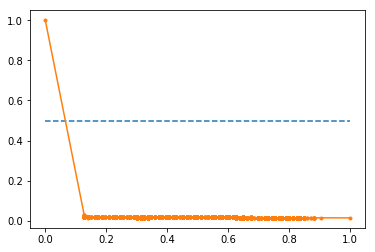

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      5914
           1       0.02      0.22      0.03        86

    accuracy                           0.82      6000
   macro avg       0.50      0.53      0.47      6000
weighted avg       0.97      0.82      0.89      6000

Confusion Matrix
[[4930  984]
 [  67   19]]


***************** F1 *****************
RandomizedSearchCV took 111.28 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.914 (std: 0.008)
Parameters: {'n_estimators': 159}

Model with rank: 2
Mean validation score: 0.911 (std: 0.007)
Parameters: {'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.911 (std: 0.009)
Parameters: {'n_estimators': 80}

Precision: [0.01433333 0.01454732 0.01455729 ... 0.02868852 0.02880658 1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.08139535 0.08139535 0.        ]
f1=0.032 auc=0.058 ap=0.019


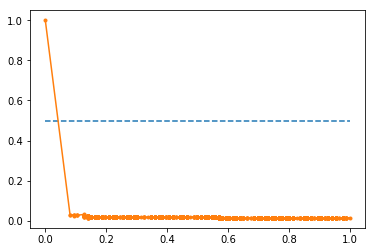

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      5914
           1       0.02      0.19      0.03        86

    accuracy                           0.84      6000
   macro avg       0.50      0.52      0.47      6000
weighted avg       0.97      0.84      0.90      6000

Confusion Matrix
[[5023  891]
 [  70   16]]




In [173]:
m = DecisionTreeClassifier( class_weight={0: 0.1, 1: 0.9}, max_depth=11, max_features=28, min_samples_split=23)
model = BaggingClassifier(m)
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"n_estimators":  sp_randint(20,200)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 246.28 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.985 (std: 0.013)
Parameters: {'n_estimators': 139}

Model with rank: 2
Mean validation score: 0.985 (std: 0.012)
Parameters: {'n_estimators': 181}

Model with rank: 3
Mean validation score: 0.984 (std: 0.012)
Parameters: {'n_estimators': 123}

Precision: [0.01433333 0.01588961 0.01589293 ... 0.25       0.5        1.        ]
Recall:    [1.         0.88372093 0.88372093 ... 0.01162791 0.01162791 0.        ]
f1=0.038 auc=0.032 ap=0.027


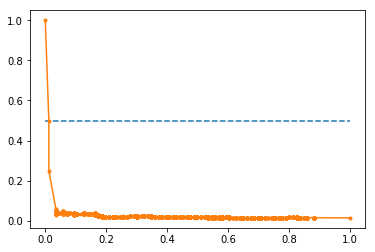

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      5914
           1       0.02      0.24      0.04        86

    accuracy                           0.82      6000
   macro avg       0.50      0.54      0.47      6000
weighted avg       0.97      0.82      0.89      6000

Confusion Matrix
[[4913 1001]
 [  65   21]]


***************** F1 *****************
RandomizedSearchCV took 197.30 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.921 (std: 0.009)
Parameters: {'n_estimators': 68}

Model with rank: 2
Mean validation score: 0.919 (std: 0.007)
Parameters: {'n_estimators': 169}

Model with rank: 3
Mean validation score: 0.918 (std: 0.009)
Parameters: {'n_estimators': 170}

Precision: [0.01433333 0.01603795 0.01606698 ... 0.25       0.16666667 1.        ]
Recall:    [1.         0.8255814  0.8255814  ... 0.02325581 0.01162791 0.        ]
f1=0.038 auc=0.033 ap=0.027


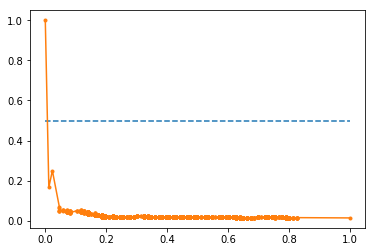

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      5914
           1       0.02      0.26      0.04        86

    accuracy                           0.81      6000
   macro avg       0.50      0.54      0.47      6000
weighted avg       0.97      0.81      0.88      6000

Confusion Matrix
[[4855 1059]
 [  64   22]]




In [174]:
m = DecisionTreeClassifier( class_weight={0: 0.01, 1: 0.99}, max_depth=34, max_features=20, min_samples_split=18)
model = BaggingClassifier(m)
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"n_estimators":  sp_randint(20,200)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** RECALL *****************
RandomizedSearchCV took 37.97 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.997 (std: 0.003)
Parameters: {'n_estimators': 195}

Model with rank: 1
Mean validation score: 0.997 (std: 0.003)
Parameters: {'n_estimators': 159}

Model with rank: 1
Mean validation score: 0.997 (std: 0.003)
Parameters: {'n_estimators': 59}

Precision: [0.01435966 0.01420929 0.01421167 ... 0.01722158 0.01734104 1.        ]
Recall:    [1.         0.98837209 0.98837209 ... 0.52325581 0.52325581 0.        ]
f1=0.030 auc=0.274 ap=0.017


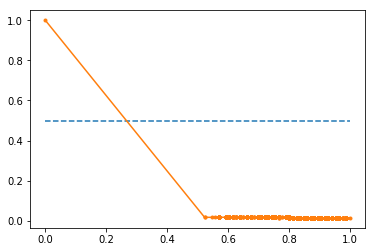

              precision    recall  f1-score   support

           0       0.99      0.19      0.32      5914
           1       0.02      0.86      0.03        86

    accuracy                           0.20      6000
   macro avg       0.50      0.53      0.18      6000
weighted avg       0.98      0.20      0.32      6000

Confusion Matrix
[[1137 4777]
 [  12   74]]


***************** F1 *****************
RandomizedSearchCV took 41.36 seconds for 3 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.712 (std: 0.010)
Parameters: {'n_estimators': 189}

Model with rank: 2
Mean validation score: 0.712 (std: 0.010)
Parameters: {'n_estimators': 89}

Model with rank: 3
Mean validation score: 0.711 (std: 0.012)
Parameters: {'n_estimators': 190}

Precision: [0.01433333 0.01428814 0.01429058 ... 0.01730921 0.01765719 1.        ]
Recall:    [1.         0.97674419 0.97674419 ... 0.51162791 0.47674419 0.        ]
f1=0.030 auc=0.251 ap=0.017


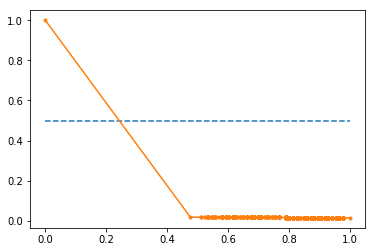

              precision    recall  f1-score   support

           0       0.99      0.19      0.31      5914
           1       0.02      0.86      0.03        86

    accuracy                           0.20      6000
   macro avg       0.50      0.52      0.17      6000
weighted avg       0.98      0.20      0.31      6000

Confusion Matrix
[[1100 4814]
 [  12   74]]




In [175]:
m = DecisionTreeClassifier( class_weight={0: 0.01, 1: 0.99}, max_depth=7, max_features=10, min_samples_split=23)
model = BaggingClassifier(m)
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {"n_estimators":  sp_randint(20,200)
             }
# run randomized search
n_iter_search = 3

for i in ['recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=2, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

# Best Models

### Boosting

In [347]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

In [363]:
boost = AdaBoostClassifier(DecisionTreeClassifier( class_weight={0: 0.05, 1: 0.95}, max_depth=7, max_features=32, min_samples_split=13))
boost.fit(Xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.05,
                                                                       1: 0.95},
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=32,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=13,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                     

[2.40344447e-07 2.43576479e-07 2.47947052e-07 ... 4.27841381e-01
 5.41423943e-01 6.79918500e-01]
f1=0.042 auc=0.014 ap=0.017


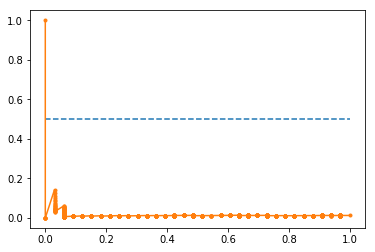

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2667
           1       0.03      0.06      0.04        33

    accuracy                           0.97      2700
   macro avg       0.51      0.52      0.51      2700
weighted avg       0.98      0.97      0.97      2700

Confustion Matrix
[[2606   61]
 [  31    2]]


In [502]:
from sklearn.metrics import auc
probs = boost.predict_proba(X_valid)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = boost.predict(X_valid)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print(thresholds)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

print(classification_report(testy, yhat))
print('Confusion Matrix')
print(confusion_matrix(testy, yhat))

In [363]:
boost = AdaBoostClassifier(DecisionTreeClassifier( class_weight={0: 0.05, 1: 0.95}, max_depth=7, max_features=32, min_samples_split=13))
boost.fit(Xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.05,
                                                                       1: 0.95},
                                                         criterion='gini',
                                                         max_depth=7,
                                                         max_features=32,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=13,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                     

[3.23977362e-06 3.26431896e-06 3.27450389e-06 ... 5.38538118e-01
 5.50437346e-01 5.67801350e-01]
f1=0.026 auc=0.018 ap=0.021


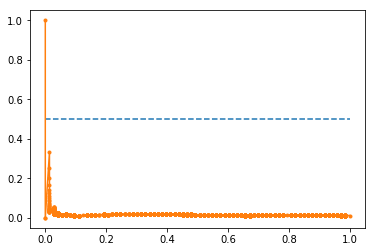

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5927
           1       0.25      0.01      0.03        73

    accuracy                           0.99      6000
   macro avg       0.62      0.51      0.51      6000
weighted avg       0.98      0.99      0.98      6000

Confusion Matrix
[[5924    3]
 [  72    1]]


In [360]:
from sklearn.metrics import auc
probs = boost.predict_proba(X_valid)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = boost.predict(X_valid)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print(thresholds)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

print(classification_report(testy, yhat))
print('Confusion Matrix')
print(confusion_matrix(testy, yhat))

In [383]:
boost = AdaBoostClassifier(DecisionTreeClassifier( class_weight={0: 0.05, 1: 0.95}, max_depth=4, max_features=7, min_samples_split=11))
boost.fit(Xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 0.05,
                                                                       1: 0.95},
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=7,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=11,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                      

[0.05246215 0.05254149 0.0527597  ... 0.56975075 0.58677039 0.63440918]
f1=0.057 auc=0.024 ap=0.028


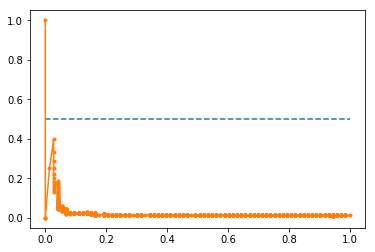

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5927
           1       0.06      0.05      0.06        73

    accuracy                           0.98      6000
   macro avg       0.52      0.52      0.52      6000
weighted avg       0.98      0.98      0.98      6000

Confusion Matrix
[[5863   64]
 [  69    4]]


In [384]:
from sklearn.metrics import auc
probs = boost.predict_proba(X_valid)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = boost.predict(X_valid)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print(thresholds)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

print(classification_report(testy, yhat))
print('Confusion Matrix')
print(confusion_matrix(testy, yhat))

In [393]:
#best_model =best_modelelModel_fibest_modellt_model

#### Blah blah

# Random Forest

***************** F1 *****************
RandomizedSearchCV took 41.02 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.926 (std: 0.009)
Parameters: {'max_depth': 4, 'max_features': 8, 'min_samples_split': 11}

Model with rank: 2
Mean validation score: 0.925 (std: 0.013)
Parameters: {'max_depth': 4, 'max_features': 11, 'min_samples_split': 19}

Model with rank: 3
Mean validation score: 0.923 (std: 0.003)
Parameters: {'max_depth': 4, 'max_features': 9, 'min_samples_split': 22}

Precision: [0.01228543 0.01211917 0.01212325 ... 0.         0.         1.        ]
Recall:    [1.         0.98630137 0.98630137 ... 0.         0.         0.        ]
f1=0.050 auc=0.019 ap=0.020


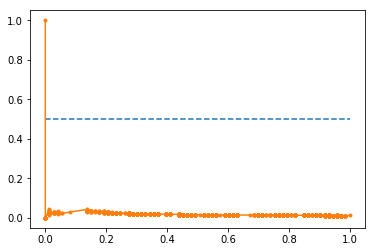

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5927
           1       0.03      0.21      0.05        73

    accuracy                           0.91      6000
   macro avg       0.51      0.56      0.50      6000
weighted avg       0.98      0.91      0.94      6000

Confusion Matrix
[[5416  511]
 [  58   15]]




In [368]:
model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(2, 5),
              "max_features": sp_randint(5, 12),
              "min_samples_split": sp_randint(10, 25)}
# run randomized search
n_iter_search = 100

for i in ['f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

blah blah......

***************** PRECISION *****************
RandomizedSearchCV took 63.92 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.990 (std: 0.014)
Parameters: {'max_depth': 3, 'max_features': 20, 'min_samples_split': 13}

Model with rank: 2
Mean validation score: 0.950 (std: 0.034)
Parameters: {'max_depth': 3, 'max_features': 21, 'min_samples_split': 12}

Model with rank: 3
Mean validation score: 0.950 (std: 0.018)
Parameters: {'max_depth': 2, 'max_features': 24, 'min_samples_split': 5}

Precision: [0.01216869 0.01389291 0.01390096 0.01427297 0.01471103 0.01534527
 0.01627339 0.01642036 0.0164271  0.01645413 0.01681076 0.01706485
 0.01707317 0.01709819 0.01723289 0.01724138 0.01724988 0.01749125
 0.01750875 0.01799486 0.0189911  0.01916168 0.01919616 0.01938219
 0.02005175 0.02007772 0.02057067 0.02062542 0.02063915 0.02066667
 0.02030812 0.02043693 0.01928571 0.01995395 0.0192604  0.01936483
 0.01939488 0.01942502 0.01870616 0.01872075 0.01892744 0

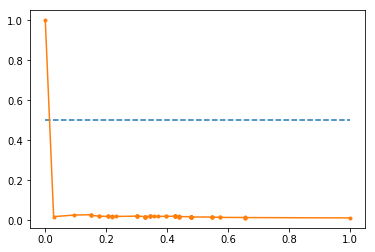

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5927
           1       0.02      0.15      0.04        73

    accuracy                           0.92      6000
   macro avg       0.51      0.54      0.50      6000
weighted avg       0.98      0.92      0.95      6000

Confusion Matrix
[[5486  441]
 [  62   11]]


***************** RECALL *****************
RandomizedSearchCV took 65.70 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.867 (std: 0.018)
Parameters: {'max_depth': 3, 'max_features': 3, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.864 (std: 0.029)
Parameters: {'max_depth': 3, 'max_features': 3, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.863 (std: 0.024)
Parameters: {'max_depth': 3, 'max_features': 3, 'min_samples_split': 18}

Precision: [0.012329   0.0121848  0.01219099 ... 0.         0.         1.        ]
Recall:    [1.       

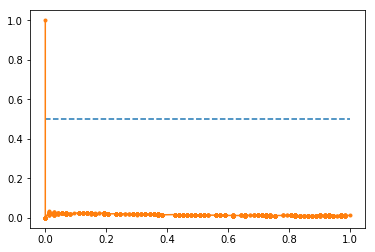

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      5927
           1       0.02      0.25      0.04        73

    accuracy                           0.85      6000
   macro avg       0.51      0.55      0.48      6000
weighted avg       0.98      0.85      0.91      6000

Confusion Matrix
[[5079  848]
 [  55   18]]


***************** F1 *****************
RandomizedSearchCV took 57.57 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.882 (std: 0.011)
Parameters: {'max_depth': 3, 'max_features': 6, 'min_samples_split': 16}

Model with rank: 2
Mean validation score: 0.881 (std: 0.013)
Parameters: {'max_depth': 3, 'max_features': 8, 'min_samples_split': 24}

Model with rank: 3
Mean validation score: 0.877 (std: 0.014)
Parameters: {'max_depth': 3, 'max_features': 2, 'min_samples_split': 24}

Precision: [0.01221962 0.01214985 0.01215805 0.01213468 0.01198835 0.01199657
 0.01199863 0.01202129 0.012

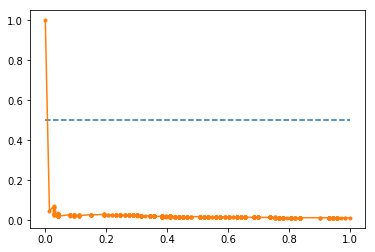

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5927
           1       0.03      0.25      0.05        73

    accuracy                           0.88      6000
   macro avg       0.51      0.57      0.49      6000
weighted avg       0.98      0.88      0.92      6000

Confusion Matrix
[[5255  672]
 [  55   18]]




In [346]:
model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 4),
              "max_features": sp_randint(1, 37),
              "min_samples_split": sp_randint(2, 25)}
# run randomized search
n_iter_search = 100

for i in ['precision','recall', 'f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

blah blah ...

***************** F1 *****************
RandomizedSearchCV took 91.74 seconds for 200 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.927 (std: 0.005)
Parameters: {'max_depth': 4, 'max_features': 7, 'min_samples_split': 11}

Model with rank: 2
Mean validation score: 0.925 (std: 0.010)
Parameters: {'max_depth': 4, 'max_features': 7, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.924 (std: 0.013)
Parameters: {'max_depth': 4, 'max_features': 8, 'min_samples_split': 11}

Precision: [0.01253649 0.01239243 0.01239456 ... 0.03921569 0.04081633 1.        ]
Recall:    [1.         0.98630137 0.98630137 ... 0.02739726 0.02739726 0.        ]
f1=0.056 auc=0.033 ap=0.021


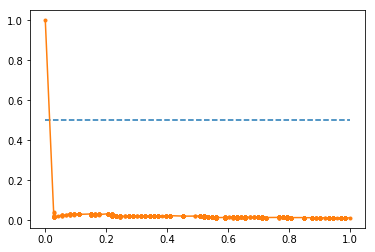

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      5927
           1       0.03      0.21      0.06        73

    accuracy                           0.92      6000
   macro avg       0.51      0.56      0.51      6000
weighted avg       0.98      0.92      0.94      6000

Confusion Matrix
[[5475  452]
 [  58   15]]




In [373]:
model = RandomForestClassifier()
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(3, 5),
              "max_features": sp_randint(7, 9),
              "min_samples_split": sp_randint(10, 12)}
# run randomized search
n_iter_search = 200

for i in ['f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

In [478]:
while classification_report(y_valid, random_search.best_estimator_.predict(X_valid), output_dict=True)['1']['f1-score']<0.05468751:
    model = RandomForestClassifier(warm_start=True)
    testy = y_valid

    from sklearn.metrics import auc

    # specify parameters and distributions to sample from

    param_dist = {
                  "max_depth": sp_randint(3, 5),
                  "max_features": sp_randint(7, 9),
                  "min_samples_split": sp_randint(10, 12)}
    # run randomized search
    n_iter_search = 200

    for i in ['f1']:

        print('***************** ' +i.upper()+ ' *****************')
        random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                           n_iter=n_iter_search, cv=3, iid=False, scoring=i)
        start = time()
        random_search.fit(Xtrain, ytrain)
        print("RandomizedSearchCV took %.2f seconds for %d candidates"
              " parameter settings." % ((time() - start), n_iter_search))
        print(classification_report(y_valid, random_search.best_estimator_.predict(X_valid), output_dict=True)['1']['f1-score'])
        print(confusion_matrix(y_valid, random_search.best_estimator_.predict(X_valid)))

***************** F1 *****************
RandomizedSearchCV took 100.90 seconds for 200 candidates parameter settings.
0.03493449781659389
[[5775  152]
 [  69    4]]
***************** F1 *****************
RandomizedSearchCV took 93.34 seconds for 200 candidates parameter settings.
0.03493449781659389
[[5775  152]
 [  69    4]]
***************** F1 *****************
RandomizedSearchCV took 94.73 seconds for 200 candidates parameter settings.
0.020942408376963352
[[5811  116]
 [  71    2]]
***************** F1 *****************
RandomizedSearchCV took 91.69 seconds for 200 candidates parameter settings.
0.056962025316455694
[[5693  234]
 [  64    9]]


In [490]:
print(classification_report(y_valid,random_search.best_estimator_.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5927
           1       0.04      0.12      0.06        73

    accuracy                           0.95      6000
   macro avg       0.51      0.54      0.52      6000
weighted avg       0.98      0.95      0.96      6000



blah blah ...

In [432]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)

In [479]:
#Model_fin2 = random_search.best_estimator_

In [640]:
from sklearn.ensemble import ExtraTreesClassifier

***************** F1 *****************
RandomizedSearchCV took 8.37 seconds for 1 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 8, 'min_samples_split': 10}

Precision: [0.01202901 0.01193232 0.01193658 0.01194722 0.01195148 0.01196429
 0.01199857 0.01200072 0.01200502 0.01200717 0.01201363 0.01201794
 0.01202009 0.01202225 0.01202657 0.01205253 0.01207425 0.01207642
 0.01208078 0.01208296 0.01208514 0.0120895  0.01209168 0.01209605
 0.01210916 0.01211792 0.01215089 0.0121575  0.01216412 0.01216854
 0.0121796  0.01218625 0.01218847 0.0121929  0.01219512 0.01228681
 0.01228907 0.01230261 0.01230487 0.01230713 0.01231165 0.01231391
 0.01231844 0.01232071 0.01232297 0.01232524 0.01232751 0.01233432
 0.01233659 0.01235251 0.01235479 0.0123799  0.01238218 0.01239134
 0.01221092 0.01222222 0.01226766 0.01236187 0.01236418 0.0123665
 0.01236882 0.01237345 0.01237577 0.01238042 0.01238274 0.01240135
 0.01

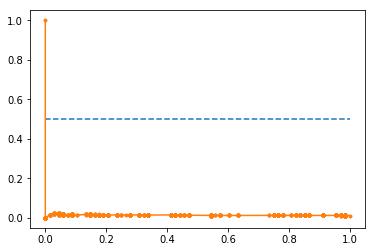

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5932
           1       0.00      0.00      0.00        68

    accuracy                           0.99      6000
   macro avg       0.49      0.50      0.50      6000
weighted avg       0.98      0.99      0.98      6000

Confusion Matrix
[[5932    0]
 [  68    0]]




In [649]:
model = ExtraTreesClassifier(class_weight={0: 0.05, 1: 0.95})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(3, 5),
              "max_features": sp_randint(7, 9),
              "min_samples_split": sp_randint(10, 12)}
# run randomized search
n_iter_search = 1

for i in ['f1']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

***************** F1 *****************
RandomizedSearchCV took 79.01 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 11, 'min_samples_split': 12}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_features': 9, 'min_samples_split': 8}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 8}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 16}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_features': 14, 'min_samples_split': 8}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 4, 'max_features': 7, 'min_samples_split': 8}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'ma

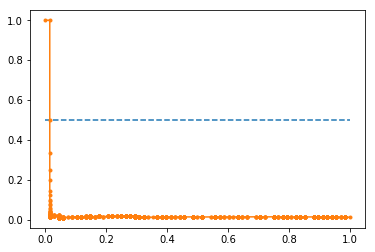

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5932
           1       0.00      0.00      0.00        68

    accuracy                           0.99      6000
   macro avg       0.49      0.50      0.50      6000
weighted avg       0.98      0.99      0.98      6000

Confusion Matrix
[[5932    0]
 [  68    0]]


***************** PRECISION *****************
RandomizedSearchCV took 81.91 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 12, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 1, 'max_features': 13, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 2, 'max_features': 5, 'min_samples_split': 14}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_fea

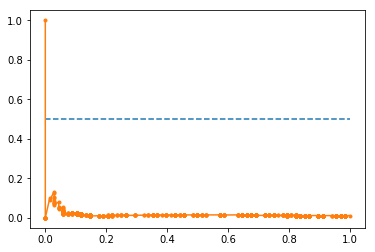

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5932
           1       0.00      0.00      0.00        68

    accuracy                           0.99      6000
   macro avg       0.49      0.50      0.50      6000
weighted avg       0.98      0.99      0.98      6000

Confusion Matrix
[[5932    0]
 [  68    0]]


***************** RECALL *****************
RandomizedSearchCV took 79.30 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 5, 'max_features': 13, 'min_samples_split': 4}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 11, 'min_samples_split': 14}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_split': 19}

Model with rank: 1
Mean validation score: 0.000 (std: 0.000)
Parameters: {'max_depth': 6, 'max_feature

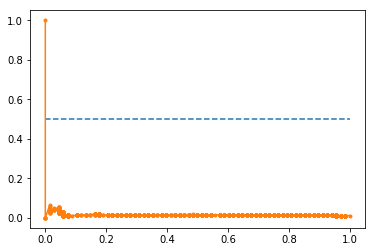

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5932
           1       0.00      0.00      0.00        68

    accuracy                           0.99      6000
   macro avg       0.49      0.50      0.50      6000
weighted avg       0.98      0.99      0.98      6000

Confusion Matrix
[[5932    0]
 [  68    0]]




In [648]:
model = ExtraTreesClassifier(class_weight={0: 0.05, 1: 0.95})
testy = y_valid

from sklearn.metrics import auc

# specify parameters and distributions to sample from

param_dist = {
              "max_depth": sp_randint(1, 7),
              "max_features": sp_randint(4, 15),
              "min_samples_split": sp_randint(3, 20)}
# run randomized search
n_iter_search = 10

for i in ['f1', 'precision', 'recall']:
    
    print('***************** ' +i.upper()+ ' *****************')
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=3, iid=False, scoring=i)
    start = time()
    random_search.fit(Xtrain, ytrain)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))
    report(results=random_search.cv_results_, random_search=random_search, testy=testy)

# Determine the Threshold

******Threshold: 0.05409640697356414 *******
{'precision': 0.012166666666666666, 'recall': 1.0, 'f1-score': 0.024040836489379217, 'support': 73}

[[   0 5927]
 [   0   73]]

******Threshold: 0.10524164264311124 *******
{'precision': 0.012170723574524842, 'recall': 1.0, 'f1-score': 0.024048756382803495, 'support': 73}

[[   2 5925]
 [   0   73]]

******Threshold: 0.17276318710281163 *******
{'precision': 0.012538061973849185, 'recall': 0.958904109589041, 'f1-score': 0.02475247524752475, 'support': 73}

[[ 414 5513]
 [   3   70]]

******Threshold: 0.23611474021378204 *******
{'precision': 0.01413760603204524, 'recall': 0.821917808219178, 'f1-score': 0.027797081306462818, 'support': 73}

[[1743 4184]
 [  13   60]]

******Threshold: 0.2826554728397897 *******
{'precision': 0.016069635085369936, 'recall': 0.6575342465753424, 'f1-score': 0.031372549019607836, 'support': 73}

[[2988 2939]
 [  25   48]]

******Threshold: 0.39204578227135906 *******
{'precision': 0.017142857142857144, 'recall':

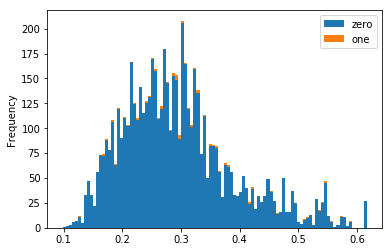

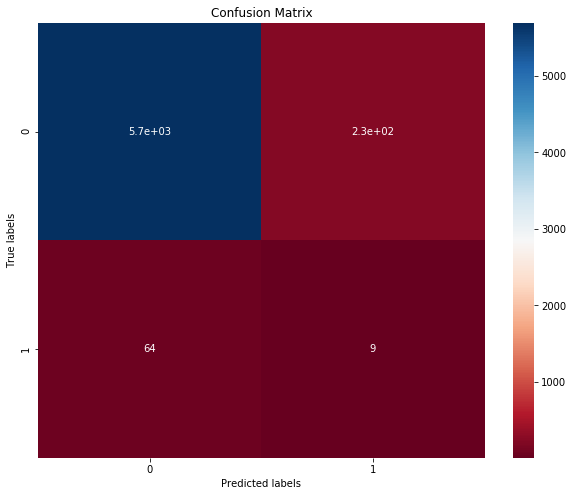

In [571]:
df_thresh = pd.DataFrame()
df_thresh['pct_1'] = Model_fin2.predict_proba(X_valid)[:,1]
df_thresh['install'] = y_valid.tolist()
df_thresh.head(100)

one = list()
zero = list()
for i, j in zip(df_thresh.pct_1.tolist(), df_thresh.install.tolist()):
    if j==1:
        one.append(i)
        zero.append(np.nan)
    elif j==0:
        zero.append(i)
        one.append(np.nan)
    else:
        print("****ERROR****")

df_thresh['one'] = one
df_thresh['zero'] = zero
df_thresh[['zero','one']].plot.hist(bins=100, stacked=True)

thresholds = sorted(np.random.uniform(high=0.723,size=10).tolist() + [0.5])
for i in thresholds:
    predict_mine = np.where(df_thresh.pct_1 > i, 1, 0)
    print('******Threshold:',i,'*******')
    print(classification_report(y_valid, predict_mine, output_dict=True)['1'])
    print('')
    print(confusion_matrix(y_valid, predict_mine))
    print('')

import seaborn as sns
#import matplotlib.pyplot as plt     

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion_matrix(y_valid, Model_fin2.predict(X_valid)), annot=True, ax = ax, cmap='RdBu'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);


In [650]:
from sklearn.externals import joblib

joblib.dump(Model_fin2, 'rf_model.pkl') 

['rf_model.pkl']

## Deep Learning

In [572]:
import keras
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

get_all_weights = lambda model: np.concatenate(tuple(map(lambda wi: wi.flatten(), model.get_weights())))

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

#### Nueral Net

In [219]:
model = Sequential()
model.add(Dense(512, input_shape=(Xtrain.shape[1],), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))

# model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m, recall_m, precision_m])

history = model.fit(Xtrain, ytrain,
                    batch_size=200, epochs=4,
                    verbose=0, validation_data=(X_valid, y_valid))

score = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train score:')
for i,j in zip(model.metrics_names, score):
    print(i, np.round(j,5))
print('')

score = model.evaluate(X_valid, y_valid, verbose=0)
# print('Test loss:', score[0])
print('Test score:')
for i,j in zip(model.metrics_names, score):
    print(i, np.round(j,5))
print('')

print('Confusion Matrix')
y_pred = model.predict(X_valid)
confusion_matrix(y_valid, y_pred)
#get_all_weights(model)

Train score:
loss 7.97119
f1_m 0.50512
recall_m 0.63886
precision_m 0.5

Test Score:
loss 15.71388
f1_m 0.02728
recall_m 0.33867
precision_m 0.01433

Confusion Matrix


array([[   0, 5914],
       [   0,   86]])

So far not too promissing. Lets try a different architecture

In [234]:
nb_epoch = 100
batch_size = 128
input_dim = Xtrain.shape[1] #num of columns
encoding_dim = 14
hidden_dim = 7
learning_rate = 1e-7

input_layer = keras.Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=keras.regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(1, activation='relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(metrics=[f1_m, recall_m, precision_m],
                    loss='mean_squared_error',
                    optimizer='adam')

autoencoder.fit(Xtrain, ytrain,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_valid, y_valid),
                    verbose=0)

score = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train score:')
for i,j in zip(model.metrics_names, score):
    print(i, np.round(j,5))
print('')

score = model.evaluate(X_valid, y_valid, verbose=0)
# print('Test loss:', score[0])
print('Test score:')
for i,j in zip(model.metrics_names, score):
    print(i, np.round(j,5))
print('')

print('Confusion Matrix')
y_pred = model.predict(X_valid)
confusion_matrix(y_valid, y_pred)

Train score:
loss 7.97119
f1_m 0.50512
recall_m 0.63886
precision_m 0.5

Test score:
loss 15.71388
f1_m 0.02728
recall_m 0.33867
precision_m 0.01433

Confusion Matrix


array([[   0, 5914],
       [   0,   86]])

Still no luck. Moving on...

## RNN

In [573]:
from keras.callbacks import Callback
from keras.layers import LSTM

In [574]:
losses = []
#losses = keras.losses.mean_absolute_error 
# losses = keras.losses.mean_squared_error
# losses = keras.losses.mean_absolute_percentage_error

def handleLoss(loss):
        global losses
        losses.append(loss)

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

In [575]:
timesteps =10
dim = 36
samples = 20000

#design network
model = Sequential()
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(108,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(dim))
model.compile(loss=keras.losses.mean_absolute_percentage_error, optimizer='adam', metrics=[f1_m, recall_m, precision_m])

def train(data):
    data.shape = (int(samples/timesteps),timesteps,dim)
    model.fit(data, data, epochs=100, batch_size=144, validation_data=(data, data), verbose=0, shuffle=False,callbacks=[LossHistory()])
    data.shape = (samples, dim)

def score(data):
    data.shape = (int(samples/timesteps),timesteps,dim)
    yhat =  model.predict(data)
    yhat.shape = (samples, dim)
    return yhat

In [579]:
# sample data to run on modles due to limit computing resources

df = X.sample(80000)
df_sort = df.sort_values(by='date')
#validation and testing set
Xtrain, X_valid = train_test_split(df_sort.drop(columns=['install', 'country','softwareVersion', 'timestamp']), test_size=20000, shuffle=False) # random state

In [580]:
print(Xtrain.shape)
Xtrain = Xtrain[X['install']==0]
print(Xtrain.shape)
Xtrain = Xtrain.sample(20000)
Xtrain.head()

(60000, 36)
(59273, 36)


,campaignId,sourceGameId,startCount,viewCount,clickCount,installCount,startCount1d,startCount7d,deviceType,date,...,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12
id,,,,,,,,,,,,,,,,,,,,,
5c3e2e4535dfaacd5f9ec3b1,7059,1458950,36,34,3,2,1,6,9243,1547578949881000000,...,-0.073466,-0.057721,-0.027177,-0.005153,-0.008059,-0.012479,0.003792,0.012018,0.018860,0.044501
5c33f54fab30793c85a95ddd,7620,123247,295,294,5,1,10,64,15869,1546909007069000000,...,-0.074153,-0.058432,-0.027631,-0.005255,-0.008219,-0.012737,0.003874,0.012282,0.019305,0.045717
5c347f997d236303cbeec593,3386,19186,4,2,0,0,4,4,9231,1546944409048000000,...,-0.080566,-0.065284,-0.032204,-0.006217,-0.009774,-0.015433,0.004845,0.015088,0.023936,0.059544
5c35ea41070f0eac51ff5446,2053,1645966,8,3,0,1,1,5,17670,1547037249175000000,...,-0.137457,-0.148769,-0.155039,-0.149912,-0.606757,0.660478,-0.076219,-0.138128,-0.117565,-0.133878
5c36834ecbb100400a77510a,1964,2879903,6,0,0,0,6,6,7655,1547076430900000000,...,-0.070651,-0.054848,-0.025386,-0.004757,-0.007429,-0.011478,0.003481,0.010994,0.017154,0.039945


In [116]:
#unit test

# df['install'][df['install']==0].sample(50)
# '5c3a157bd73604d057eae892' in (Xtrain.index.tolist() or X_valid.index.tolist())

In [581]:
Xtrain_df = Xtrain
Xvalid_df = X_valid
Xtrain = Xtrain.as_matrix()
X_valid = X_valid.as_matrix()

#reshape
Xtrain.shape = (int(samples/timesteps),timesteps,dim)

In [540]:
# history = model.fit(Xtrain, Xtrain,
#                     batch_size=100, epochs=144,
#                     verbose=0)
# model.fit(data, data, epochs=50, batch_size=72,…

In [584]:
for i in trange(7):
    print("‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑")
    train(Xtrain)
    yhat_train = score(Xtrain)
    yhat_valid = score(X_valid)
    Xtrain.shape = (samples, dim)
    X_valid.shape = (samples, dim)


print("‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑broken")
print(len(losses))
train(X_valid)
yhat_train = score(Xtrain)
yhat_valid = score(X_valid)
Xtrain.shape = (samples, dim)
X_valid.shape = (samples, dim)


  0%|          | 0/7 [00:00<?, ?it/s]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑



 14%|█▍        | 1/7 [07:04<42:28, 424.83s/it]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑


 29%|██▊       | 2/7 [13:48<34:31, 414.20s/it]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑


 43%|████▎     | 3/7 [20:03<26:44, 401.17s/it]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑


 57%|█████▋    | 4/7 [26:17<19:42, 394.28s/it]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑


 71%|███████▏  | 5/7 [32:33<13:01, 390.69s/it]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑


 86%|████████▌ | 6/7 [38:48<06:28, 388.14s/it]

‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑


100%|██████████| 7/7 [45:07<00:00, 386.78s/it]


‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑‑broken
9982


In [586]:
len(losses)*10/8

14227.5

In [520]:
len(losses)*0.25

7350.0

In [522]:
len(losses)/2

14700.0

In [523]:
Xtrain.shape

(20000, 36)

In [524]:
X_valid.shape

(20000, 36)

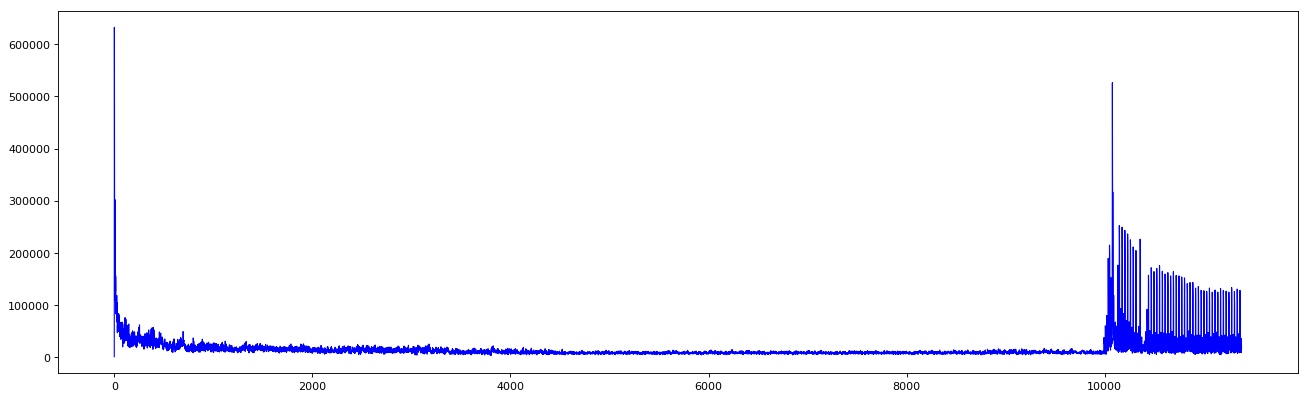

In [587]:
fig, ax = plt.subplots(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
size = Xtrain.shape[0]
#ax.set_ylim(0,energy.max())
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

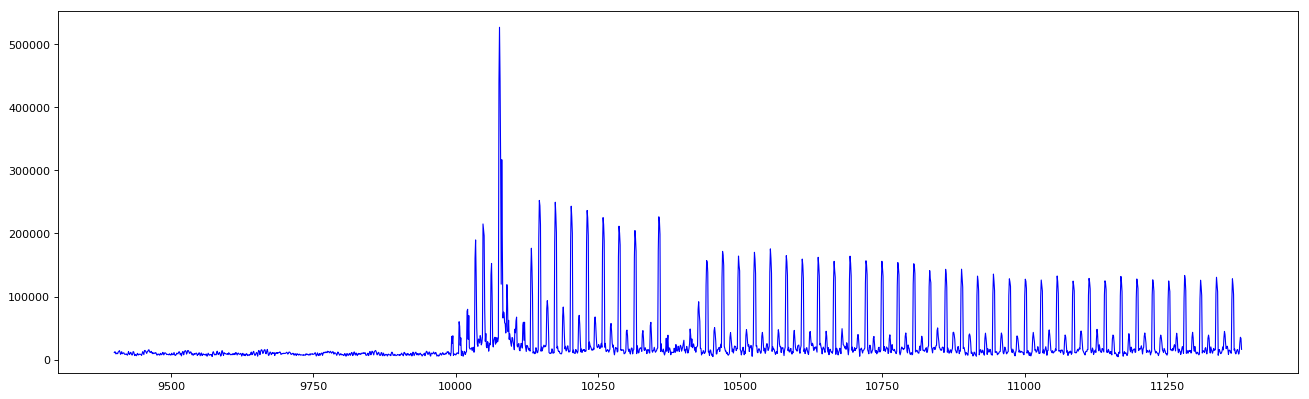

In [590]:
fig, ax = plt.subplots(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
size = Xtrain.shape[0]
#ax.set_ylim(0,energy.max())
ax.plot(range(9400,len(losses)), losses[9400:], '-', color='blue', animated = True, linewidth=1)

In [636]:
#set threshold where Xvalidation starts
sum(np.array(losses[9990:])>10000)

1256

In [622]:
Xrnn_ = df_sort.loc[Xvalid_df.index]
Xrnn_['i'] = list(range(Xrnn_.shape[0]))
Xrnn_[['i','campaignId', 'softwareVersion','date','install']].head()

,i,campaignId,softwareVersion,date,install
id,,,,,
5c41dd184c1f601fec4a1b4c,0,9351,109,1547820312933000000,0
5c41dd25b8543f1e96f45e82,1,1695,74,1547820325609000000,0
5c41dd279acc5700533acc9e,2,683,83,1547820327805000000,0
5c41dd399523381f41f92534,3,2796,83,1547820345414000000,0
5c41dd467a22491debcf479e,4,5842,105,1547820358031000000,1


In [623]:
Xrnn_.install.value_counts()

0    19741
1      259
Name: install, dtype: int64